In [1]:
%load_ext autoreload
%autoreload 2

# replicate loci chart

In [2]:

import sys
sys.path.append('C:/Users/amaguaya/OneDrive - Kienzle Automotive GmbH/Desktop/tesis_code/repos/loci')

import os
print("Working directory:", os.getcwd())



Working directory: c:\Users\amaguaya\OneDrive - Kienzle Automotive GmbH\Desktop\tesis_code\repos\loci\local_run_test


## imports

In [3]:
from sklearn.preprocessing import StandardScaler
from causa.loci import loci, loci_w_marginal
from causa.datasets import MNU, Tuebingen, SIM, SIMc, SIMG, SIMln, Cha, Multi, Net
from causa.utils import plot_pair


from sympy import im
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from causa.utils import TensorDataLoader

from nflows.transforms import CompositeTransform, ReversePermutation, AffineCouplingTransform
from nflows.distributions import StandardNormal
from nflows.flows import Flow
from nflows.nn.nets import MLP, ResidualNet
from math import ceil
from nflows.flows import SimpleRealNVP
from torch.nn import functional as F
from torch.nn.functional import relu
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingLR
from torch.distributions import Normal

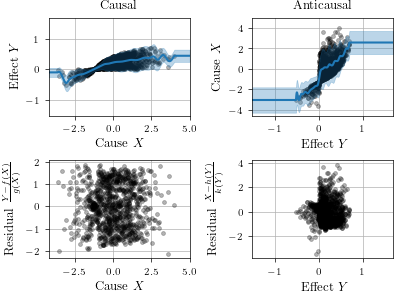

In [4]:
# We use the MNU pair 55 as an example and standardize the data
dataset = MNU(55, preprocessor=None, double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()
# This function call shows all options of LOCI, we return_function to visualize the estimator
score, f_forward, f_reverse = loci(
    x, y, independence_test=False, neural_network=False, 
    return_function=True, n_steps=50
)
plot_pair(x, y, f_forward, f_reverse)

Epoch 1: loss training: 3.6926,... Gradient Norm: 9.3265
Epoch 2: loss training: 85.3487,... Gradient Norm: 982.0737
Epoch 3: loss training: 14.0053,... Gradient Norm: 127.5717
Epoch 4: loss training: 7.2259,... Gradient Norm: 40.7762
Epoch 5: loss training: 7.6353,... Gradient Norm: 30.7407
Epoch 6: loss training: 10.7517,... Gradient Norm: 84.3701
Epoch 7: loss training: 7.4422,... Gradient Norm: 40.9591
Epoch 8: loss training: 5.3470,... Gradient Norm: 24.0251
Epoch 9: loss training: 5.0025,... Gradient Norm: 19.1312
Epoch 10: loss training: 5.5432,... Gradient Norm: 29.5750
Epoch 11: loss training: 4.9912,... Gradient Norm: 19.9237
Epoch 12: loss training: 4.4527,... Gradient Norm: 9.8530
Epoch 13: loss training: 4.2842,... Gradient Norm: 7.6250
Epoch 14: loss training: 4.1898,... Gradient Norm: 8.2403
Epoch 15: loss training: 4.0659,... Gradient Norm: 9.5266
Epoch 16: loss training: 3.8606,... Gradient Norm: 6.0889
Epoch 17: loss training: 3.7327,... Gradient Norm: 7.7304
Epoch 18

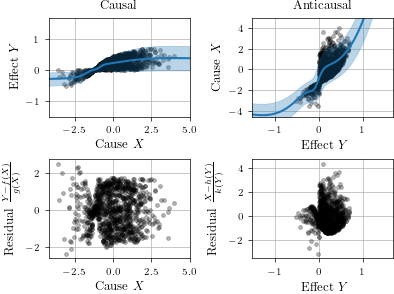

In [ ]:
# We use the MNU pair 55 as an example and standardize the data
dataset = MNU(55, preprocessor=None, double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()
# This function call shows all options of LOCI, we return_function to visualize the estimator
score_new, score_orig, f_forward, f_reverse = loci_w_marginal(
    x, y, independence_test=False, neural_network=True, 
    return_function=True, n_steps=1000, marginal_loglik = True
)
plot_pair(x, y, f_forward, f_reverse)

In [13]:
score, score_orig, score_new

(1.9649019204589362, 1.9764839707402513, 0.9770695267705247)

In [10]:
score, score_orig, score_new

(1.9649019204589362, 223.58602765957755, 222.58698347966114)

In [8]:
score, score_orig, score_new

(1.9649019204589362, 1.9649019204589362, 0.6208660565825936)

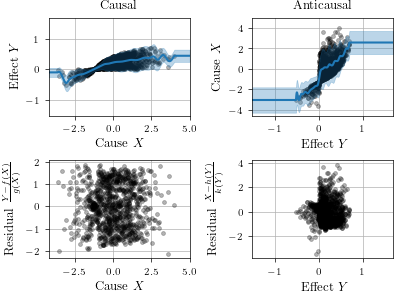

In [4]:
# We use the MNU pair 55 as an example and standardize the data
dataset = MNU(55, preprocessor=None, double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()
# This function call shows all options of LOCI, we return_function to visualize the estimator
score, f_forward, f_reverse = loci(
    x, y, independence_test=False, neural_network=False, 
    return_function=True, n_steps=50
)
plot_pair(x, y, f_forward, f_reverse)

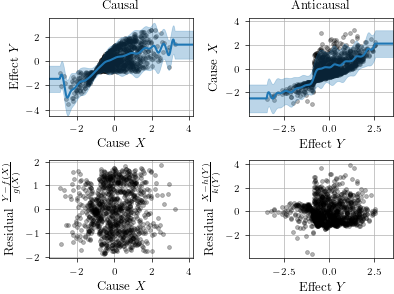

In [5]:
# We use the MNU pair 55 as an example and standardize the data
dataset = MNU(55, preprocessor=StandardScaler(), double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()
# This function call shows all options of LOCI, we return_function to visualize the estimator
score, f_forward, f_reverse = loci(
    x, y, independence_test=False, neural_network=False, 
    return_function=True, n_steps=50
)
plot_pair(x, y, f_forward, f_reverse)

# RealNVP -(Real-valued non-volume preserving) using nflows library

### Example using datasets from the paper - Check distributions


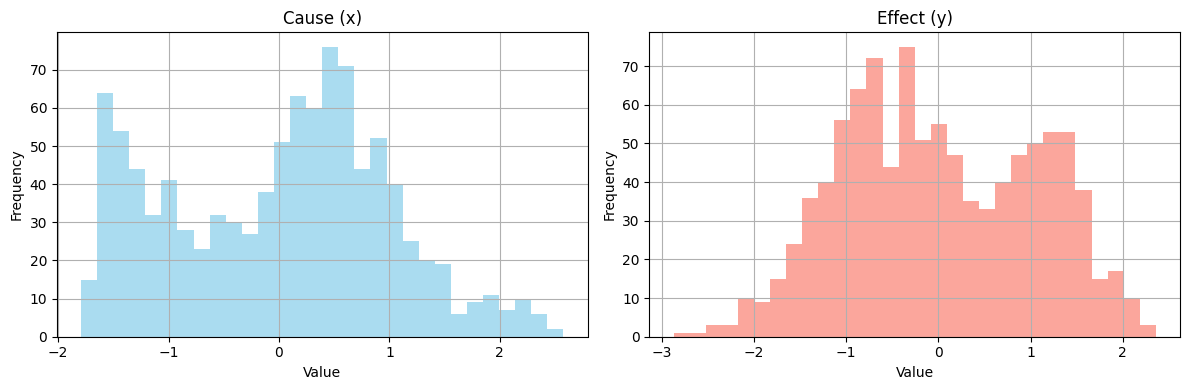

In [6]:
# We use the MNU pair 55 as an example and standardize the data
# dataset = MNU(100, preprocessor=None, double=True)
# dataset = Tuebingen(108, preprocessor=None, double=True)
dataset = SIM(100, preprocessor=None, double=True)
# dataset = SIMc(90, preprocessor=None, double=True)
# dataset = SIMG(100, preprocessor=None, double=True)
# dataset = SIMln(100, preprocessor=None, double=True)
# dataset = Cha(300, preprocessor=None, double=True)
# dataset = Multi(300, preprocessor=None, double=True)
# dataset = Net(300, preprocessor=None, double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for x
axes[0].hist(x, bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Cause (x)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Histogram for y
axes[1].hist(y, bins=30, alpha=0.7, color='salmon')
axes[1].set_title('Effect (y)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Train and apply normalizing flow approach via RealNVP using data of the paper

In [ ]:
def train_SimpleRealNV(x, multivar_x = False, n_epoch = 500):
    if multivar_x:
        var = x.T
    else:
        var = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
    features = var.shape[1] 
    num_layers = 6
    flow_SimpleRealNVP = SimpleRealNVP(
            features                = features ,
            hidden_features         = 64,
            num_layers              = num_layers,
            num_blocks_per_layer    = 4,
            use_volume_preserving   = False, # affinity coupling
            activation              = F.relu,
            dropout_probability     = 0,
            batch_norm_within_layers=False,
            batch_norm_between_layers=False,
        )

    optimizer = torch.optim.Adam(flow_SimpleRealNVP.parameters(), lr=5e-3)
    flow_SimpleRealNVP.train()
    batch_size_ = len(var) # or anything suitable
    data_loader = DataLoader(
        TensorDataset(var),
        batch_size=batch_size_,
        shuffle=False
    )

    N = len(data_loader.dataset)

    for epoch in range(n_epoch):
        epoch_loss = 0

        for batch in data_loader:
            batch_x = batch[0]
            optimizer.zero_grad()
            
            # estimate mean loss
            loss = (-flow_SimpleRealNVP.log_prob(batch_x).sum()) / N  # shape: [batch_size]

            # Backward pass
            loss.backward()

            total_norm = sum(p.grad.data.norm(2).item()**2 for p in flow_SimpleRealNVP.parameters() if p.grad is not None)**0.5
            # print(f"Epoch {epoch}, Gradient Norm: {total_norm:.4f}")

            optimizer.step()
            epoch_loss += loss.cpu().item() / len(data_loader)    
        
        # print(f"Epoch {epoch}: Avg Loss per epoch = {epoch_loss:.4f},... final loss of training: {loss:.4f},")

        # Visualize learned PDF every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Avg Loss per epoch = {epoch_loss:.4f},... final loss of training: {loss:.4f},..Gradient Norm: {total_norm:.4f}")
            # print(f"Epoch {epoch}, Gradient Norm: {total_norm:.4f}")
            with torch.no_grad():
                xs = flow_SimpleRealNVP.sample(10000).cpu().numpy()
            plt.figure(figsize=(8, 4))
            if multivar_x:
                plt.hist(var[:,0].cpu().numpy(), bins=30, density=True, alpha=0.3, label="Empirical")
                plt.hist(xs[:,0], bins=50, density=True, linewidth=2,alpha=0.25, label="Learned PDF")
            else:
                plt.hist(var.numpy(), bins=30, density=True, alpha=0.3, label="Empirical")
                plt.hist(xs.flatten(), bins=30, density=True, linewidth=2, alpha=0.25, label="Learned PDF")
            plt.legend()
            plt.title(f"Learned Density using RealNVP, iteration {epoch}")
            plt.show()
    return flow_SimpleRealNVP

C:\Users\amaguaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 0: Avg Loss per epoch = 1.5401,... final loss of training: 1.5401,
Epoch 0, Gradient Norm: 0.2666


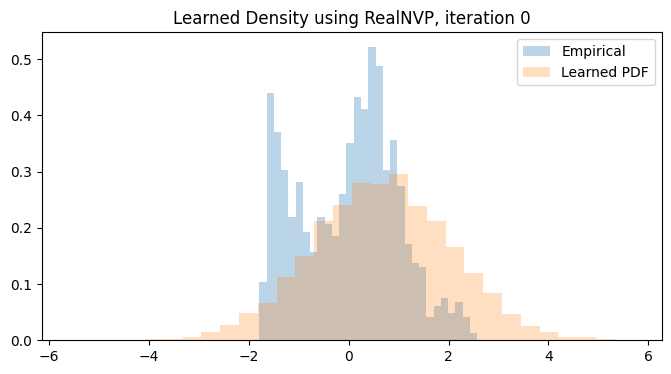

Epoch 100: Avg Loss per epoch = 1.4188,... final loss of training: 1.4188,
Epoch 100, Gradient Norm: 0.0106


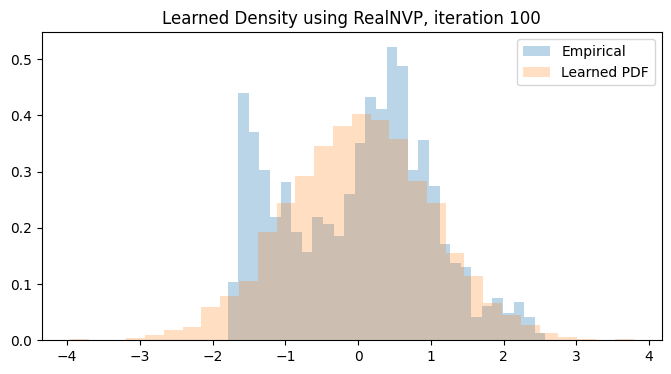

Epoch 200: Avg Loss per epoch = 1.4188,... final loss of training: 1.4188,
Epoch 200, Gradient Norm: 0.0001


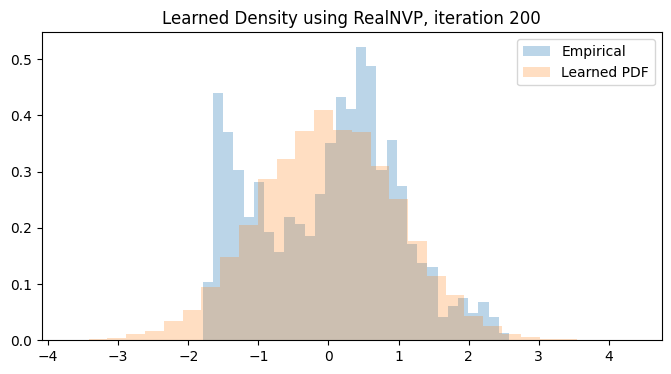

Epoch 300: Avg Loss per epoch = 1.4188,... final loss of training: 1.4188,
Epoch 300, Gradient Norm: 0.0000


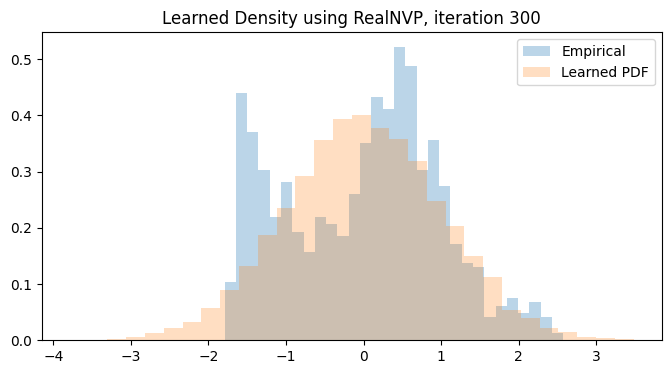

Epoch 400: Avg Loss per epoch = 1.4188,... final loss of training: 1.4188,
Epoch 400, Gradient Norm: 0.0229


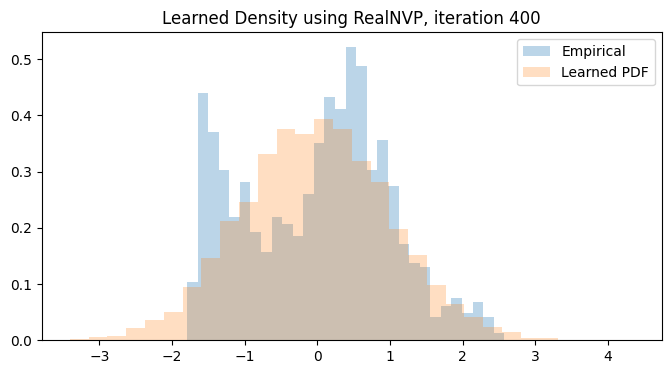

SimpleRealNVP(
  (_transform): CompositeTransform(
    (_transforms): ModuleList(
      (0): AffineCouplingTransform(
        (transform_net): ResidualNet(
          (initial_layer): Linear(in_features=1, out_features=64, bias=True)
          (blocks): ModuleList(
            (0-3): 4 x ResidualBlock(
              (linear_layers): ModuleList(
                (0-1): 2 x Linear(in_features=64, out_features=64, bias=True)
              )
              (dropout): Dropout(p=0, inplace=False)
            )
          )
          (final_layer): Linear(in_features=64, out_features=0, bias=True)
        )
      )
      (1): AffineCouplingTransform(
        (transform_net): ResidualNet(
          (initial_layer): Linear(in_features=0, out_features=64, bias=True)
          (blocks): ModuleList(
            (0-3): 4 x ResidualBlock(
              (linear_layers): ModuleList(
                (0-1): 2 x Linear(in_features=64, out_features=64, bias=True)
              )
              (dropout): Dropo

In [8]:
train_SimpleRealNV(x)

Epoch 0: Avg Loss per epoch = 1.5500,... final loss of training: 1.5500,
Epoch 0, Gradient Norm: 0.1682


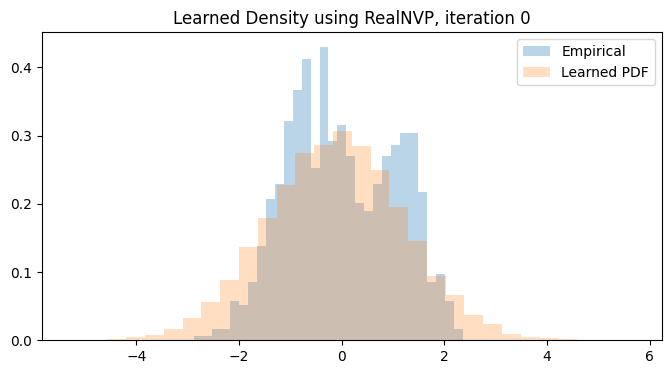

Epoch 100: Avg Loss per epoch = 1.4645,... final loss of training: 1.4645,
Epoch 100, Gradient Norm: 0.0055


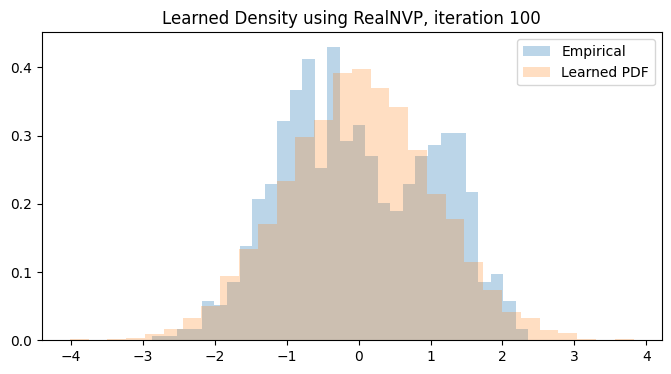

Epoch 200: Avg Loss per epoch = 1.4645,... final loss of training: 1.4645,
Epoch 200, Gradient Norm: 0.0000


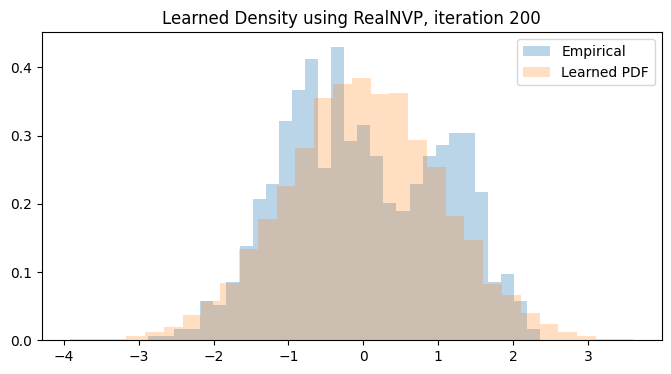

Epoch 300: Avg Loss per epoch = 1.4645,... final loss of training: 1.4645,
Epoch 300, Gradient Norm: 0.0000


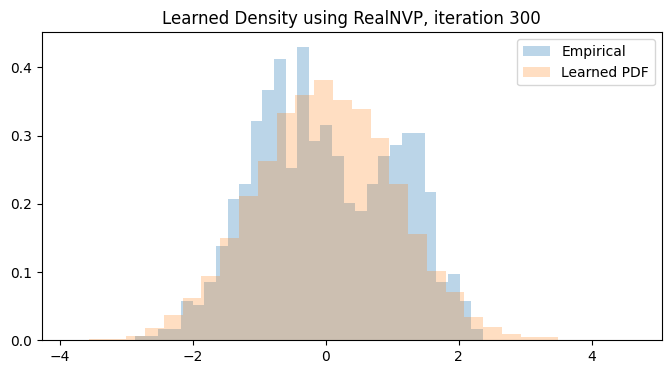

Epoch 400: Avg Loss per epoch = 1.4645,... final loss of training: 1.4645,
Epoch 400, Gradient Norm: 0.0000


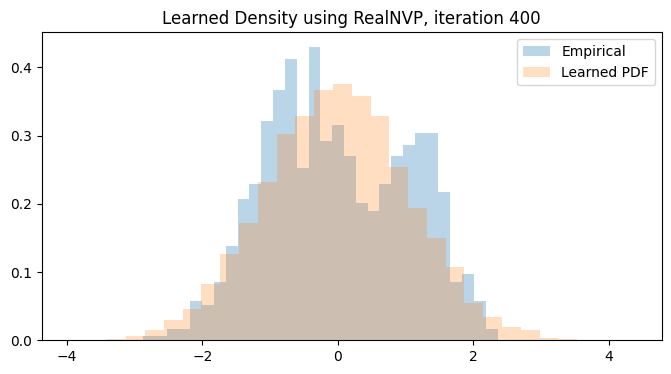

SimpleRealNVP(
  (_transform): CompositeTransform(
    (_transforms): ModuleList(
      (0): AffineCouplingTransform(
        (transform_net): ResidualNet(
          (initial_layer): Linear(in_features=1, out_features=64, bias=True)
          (blocks): ModuleList(
            (0-3): 4 x ResidualBlock(
              (linear_layers): ModuleList(
                (0-1): 2 x Linear(in_features=64, out_features=64, bias=True)
              )
              (dropout): Dropout(p=0, inplace=False)
            )
          )
          (final_layer): Linear(in_features=64, out_features=0, bias=True)
        )
      )
      (1): AffineCouplingTransform(
        (transform_net): ResidualNet(
          (initial_layer): Linear(in_features=0, out_features=64, bias=True)
          (blocks): ModuleList(
            (0-3): 4 x ResidualBlock(
              (linear_layers): ModuleList(
                (0-1): 2 x Linear(in_features=64, out_features=64, bias=True)
              )
              (dropout): Dropo

In [9]:
train_SimpleRealNV(y)

### Train and apply normalizing flow approach via RealNVP using synthetic data

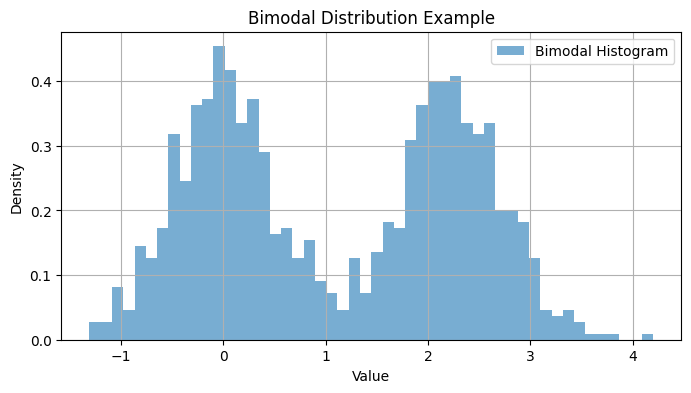

In [341]:
# Generate samples from two Gaussians
# First normal distribution: mean = 0, std = 0.5
normal_1 = np.random.normal(loc=0.0, scale=0.5, size=500)

# Second normal distribution: mean = 1.5, std = 0.5
normal_2 = np.random.normal(loc=2.2, scale=0.5, size=500)

# Combine into a single bimodal vector
bimodal_vector = np.concatenate([normal_1, normal_2])
np.random.shuffle(bimodal_vector)

# Plot it
plt.figure(figsize=(8, 4))
plt.hist(bimodal_vector, bins=50, density=True, alpha=0.6, label="Bimodal Histogram")
plt.title("Bimodal Distribution Example")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\amaguaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 0: Avg Loss per epoch = 2.2036,... final loss of training: 2.2036,
Epoch 0, Gradient Norm: 2.8143


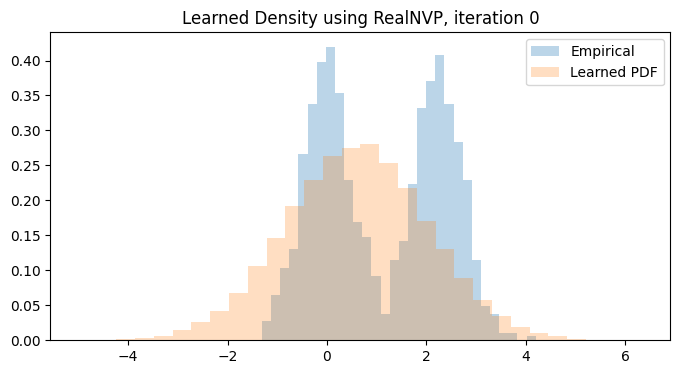

Epoch 100: Avg Loss per epoch = 1.6275,... final loss of training: 1.6275,
Epoch 100, Gradient Norm: 0.0048


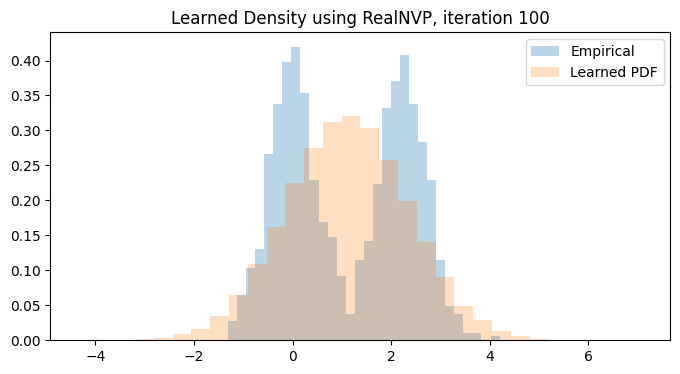

Epoch 200: Avg Loss per epoch = 1.6275,... final loss of training: 1.6275,
Epoch 200, Gradient Norm: 0.0000


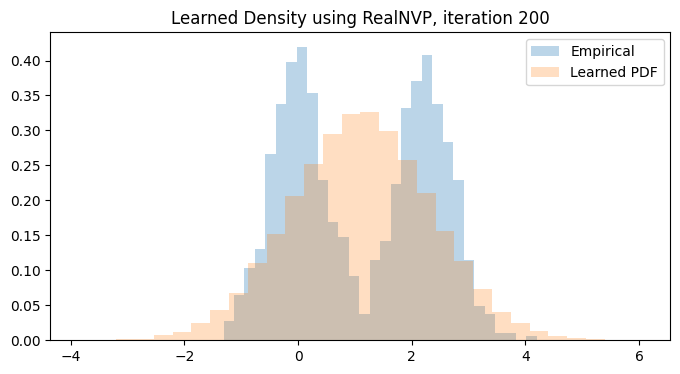

Epoch 300: Avg Loss per epoch = 1.6275,... final loss of training: 1.6275,
Epoch 300, Gradient Norm: 0.0000


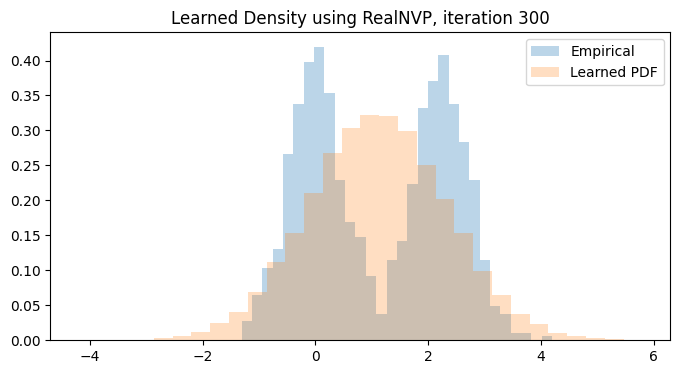

Epoch 400: Avg Loss per epoch = 1.6275,... final loss of training: 1.6275,
Epoch 400, Gradient Norm: 0.0000


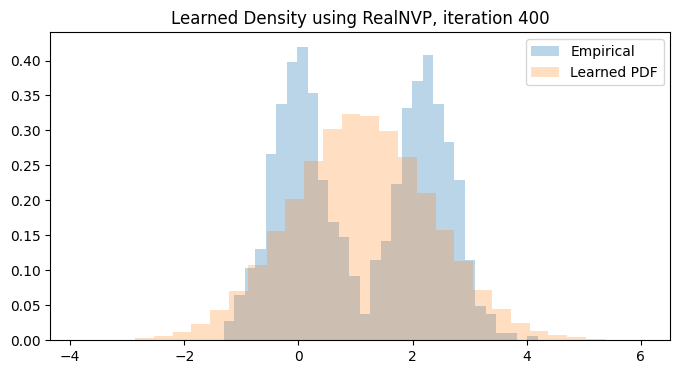

In [342]:
train_SimpleRealNV(bimodal_vector)

C:\Users\amaguaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 0: Avg Loss per epoch = 1.3548,... final loss of training: 1.3548,
Epoch 0, Gradient Norm: 0.3151


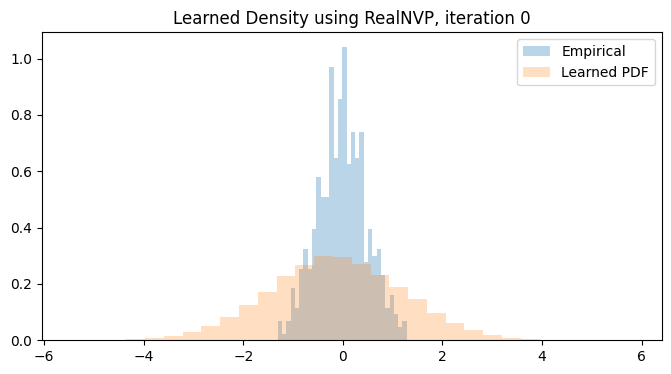

Epoch 100: Avg Loss per epoch = 1.0375,... final loss of training: 1.0375,
Epoch 100, Gradient Norm: 0.2056


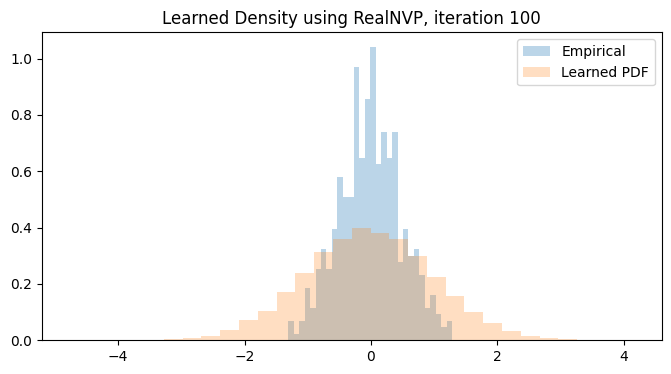

Epoch 200: Avg Loss per epoch = 1.0381,... final loss of training: 1.0381,
Epoch 200, Gradient Norm: 0.2423


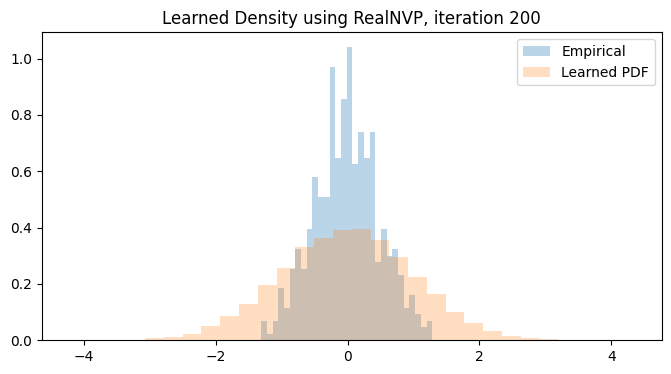

Epoch 300: Avg Loss per epoch = 1.0374,... final loss of training: 1.0374,
Epoch 300, Gradient Norm: 0.0389


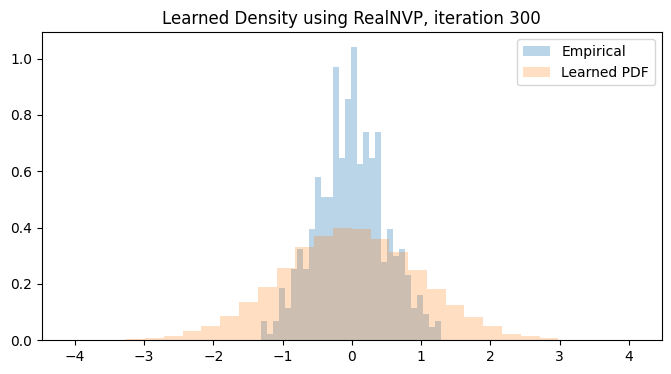

Epoch 400: Avg Loss per epoch = 1.0374,... final loss of training: 1.0374,
Epoch 400, Gradient Norm: 0.0299


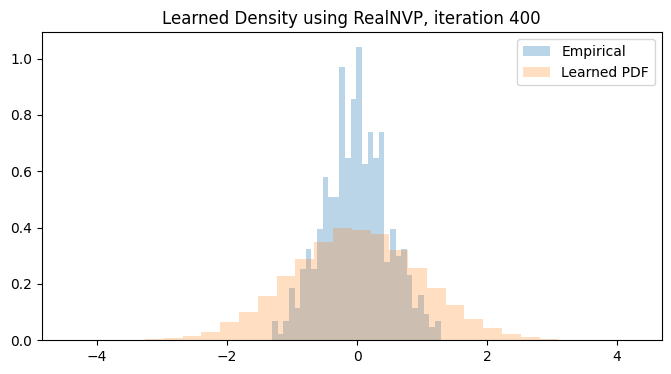

In [343]:
train_SimpleRealNV(normal_1)

### Train and apply normalizing flow approach via RealNVP using data from the paper and aggregate a random normal noise

In [11]:
# generate random noise
torch.manual_seed(42)
n = len(x)  # or y.shape[0]
noise = torch.randn(n)  # mean 0, std 1 by default
var = torch.tensor(np.array([x,noise]), dtype=torch.float32 )

Epoch 0: Avg Loss per epoch = 3.2902,... final loss of training: 3.2902,
Epoch 0, Gradient Norm: 5.3041


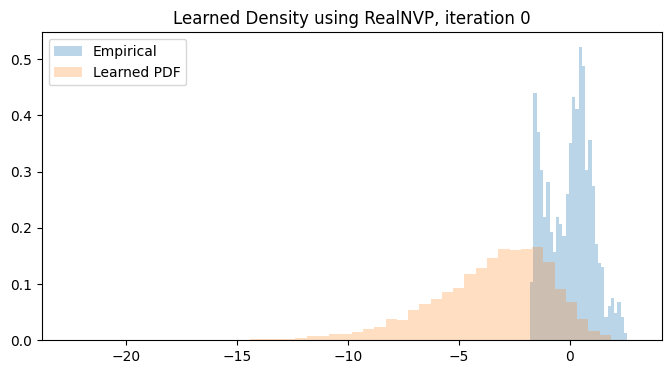

Epoch 100: Avg Loss per epoch = 2.7978,... final loss of training: 2.7978,
Epoch 100, Gradient Norm: 0.3825


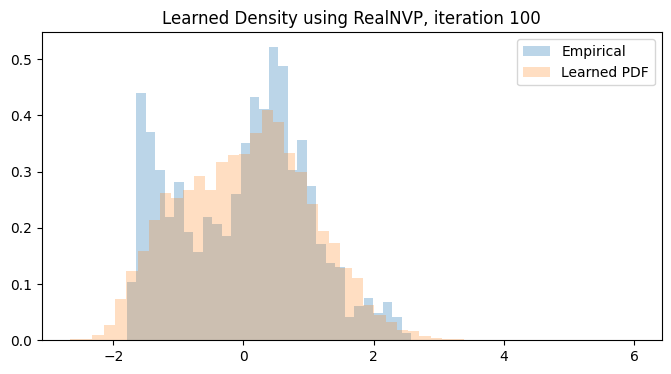

Epoch 200: Avg Loss per epoch = 2.7512,... final loss of training: 2.7512,
Epoch 200, Gradient Norm: 3.5181


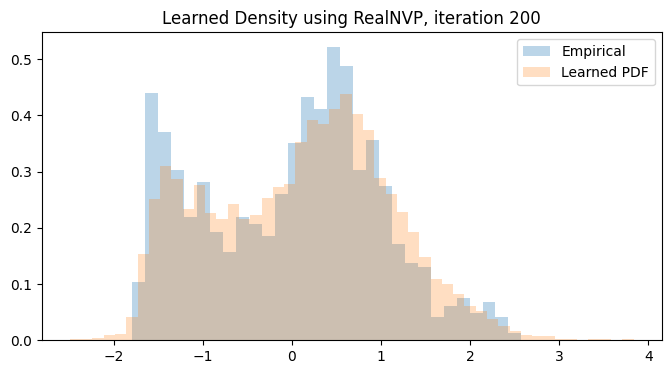

Epoch 300: Avg Loss per epoch = 2.7347,... final loss of training: 2.7347,
Epoch 300, Gradient Norm: 3.0573


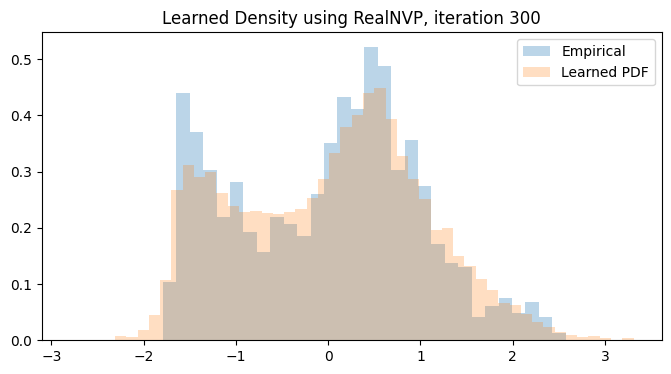

Epoch 400: Avg Loss per epoch = 2.7263,... final loss of training: 2.7263,
Epoch 400, Gradient Norm: 2.2595


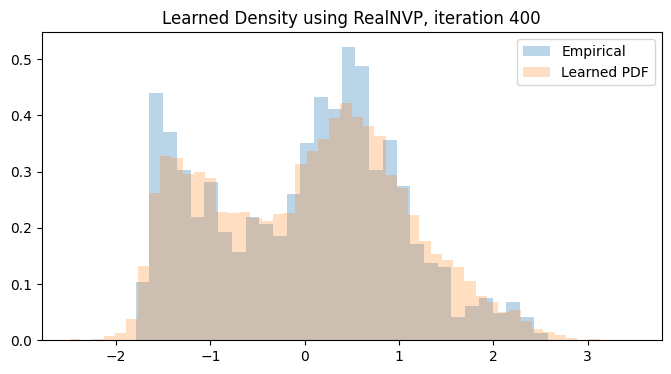

Epoch 500: Avg Loss per epoch = 2.7185,... final loss of training: 2.7185,
Epoch 500, Gradient Norm: 3.7987


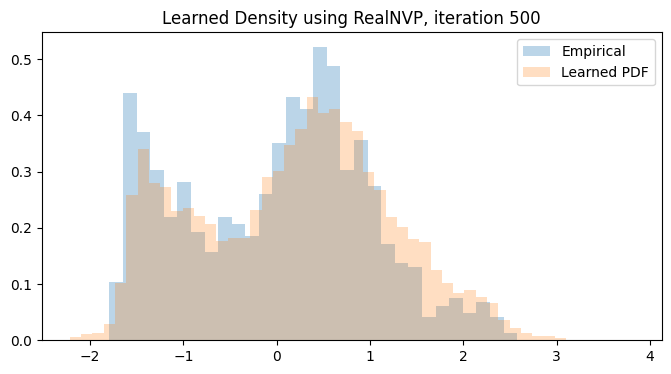

Epoch 600: Avg Loss per epoch = 2.7556,... final loss of training: 2.7556,
Epoch 600, Gradient Norm: 3.8275


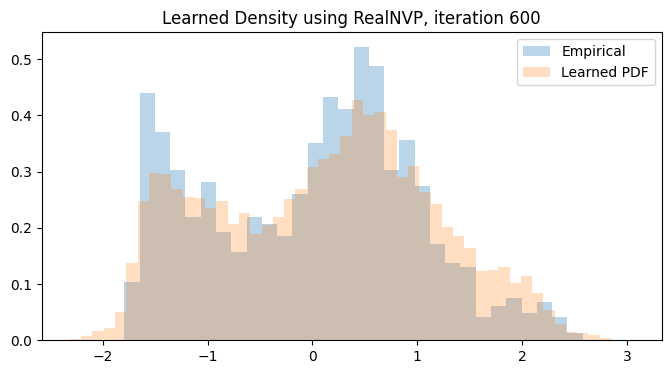

Epoch 700: Avg Loss per epoch = 2.7074,... final loss of training: 2.7074,
Epoch 700, Gradient Norm: 4.1341


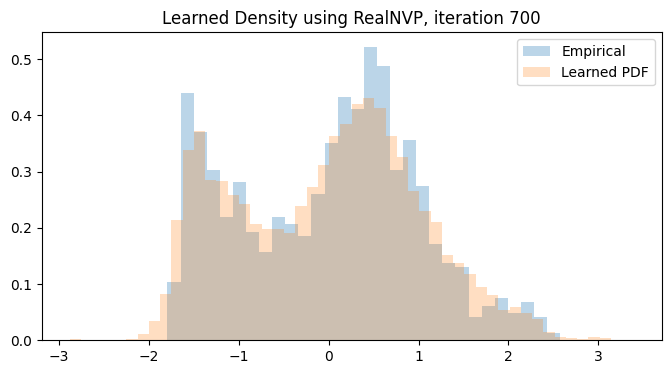

Epoch 800: Avg Loss per epoch = 2.7040,... final loss of training: 2.7040,
Epoch 800, Gradient Norm: 3.9025


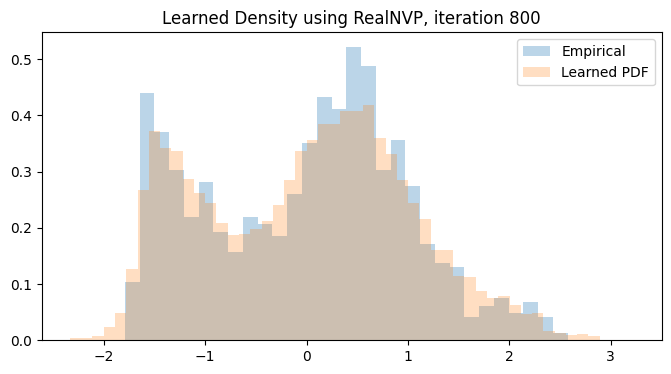

Epoch 900: Avg Loss per epoch = 2.7103,... final loss of training: 2.7103,
Epoch 900, Gradient Norm: 4.8749


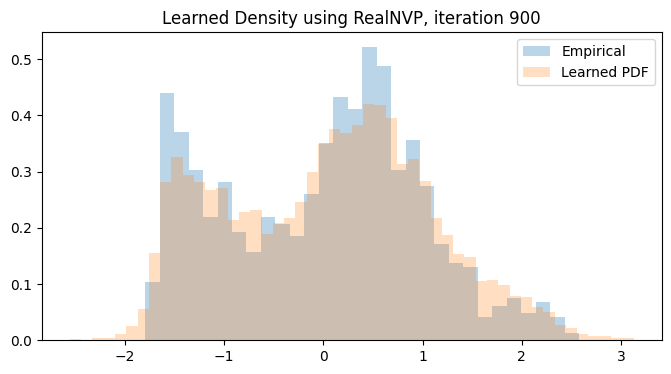

Epoch 1000: Avg Loss per epoch = 2.6920,... final loss of training: 2.6920,
Epoch 1000, Gradient Norm: 4.3179


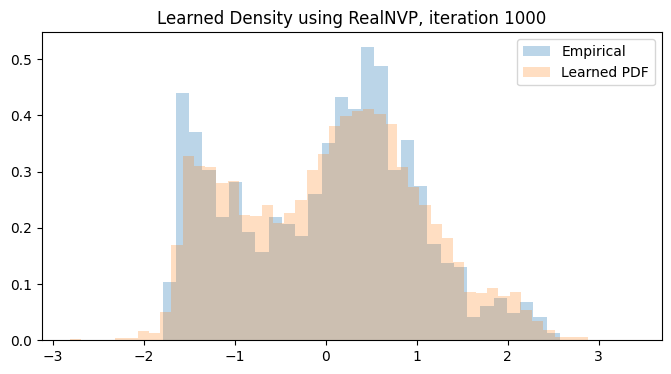

In [13]:
flow_aug_ = train_SimpleRealNV(x = var, multivar_x= True, n_epoch= 1100)

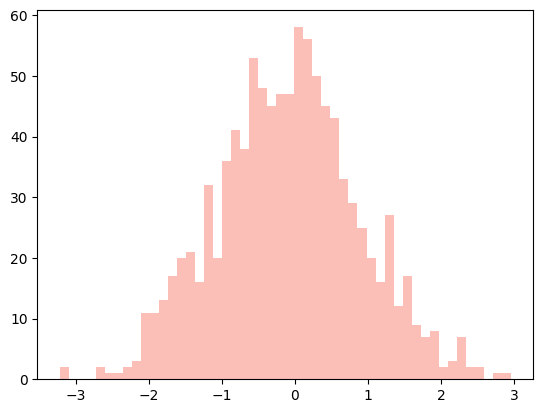

In [14]:
# calculate transform variable with aprox normal distribution
with torch.no_grad():
    transf_x, logabsdet = flow_aug_._transform(var.T) 

# plot transform variable x0
plt.hist(transf_x[:,0], bins=50, alpha=0.5, color='salmon' )
plt.show()

Epoch 0: Avg Loss per epoch = 3.4009,... final loss of training: 3.4009,
Epoch 0, Gradient Norm: 4.8930


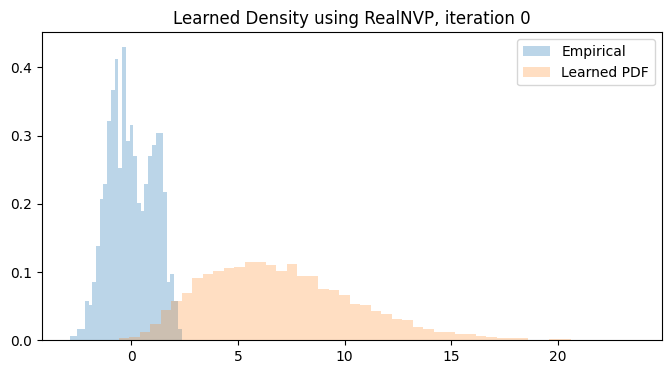

Epoch 100: Avg Loss per epoch = 2.8539,... final loss of training: 2.8539,
Epoch 100, Gradient Norm: 5.7476


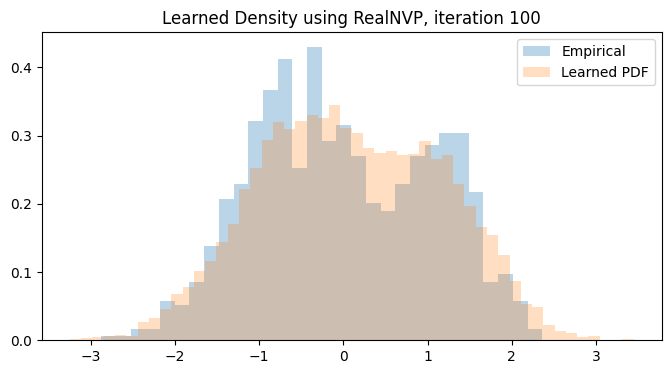

Epoch 200: Avg Loss per epoch = 2.8296,... final loss of training: 2.8296,
Epoch 200, Gradient Norm: 4.2661


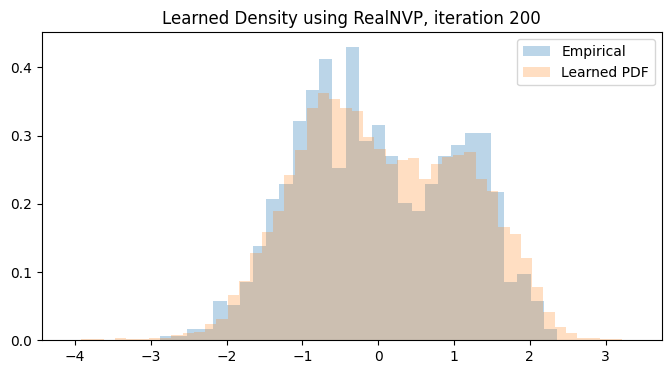

Epoch 300: Avg Loss per epoch = 2.8183,... final loss of training: 2.8183,
Epoch 300, Gradient Norm: 3.9208


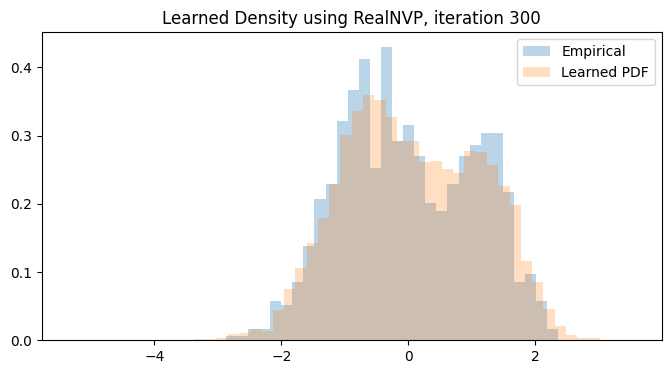

Epoch 400: Avg Loss per epoch = 2.8344,... final loss of training: 2.8344,
Epoch 400, Gradient Norm: 8.6925


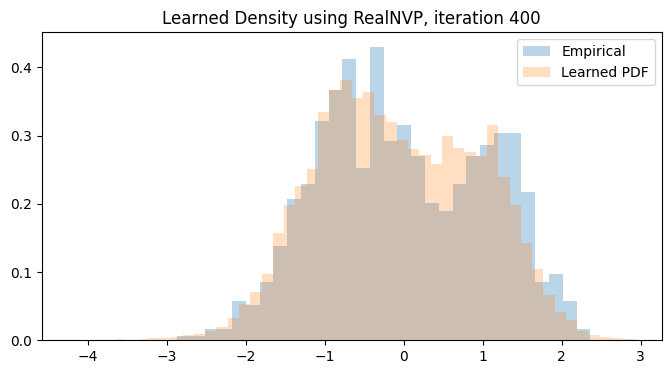

Epoch 500: Avg Loss per epoch = 2.8264,... final loss of training: 2.8264,
Epoch 500, Gradient Norm: 6.7130


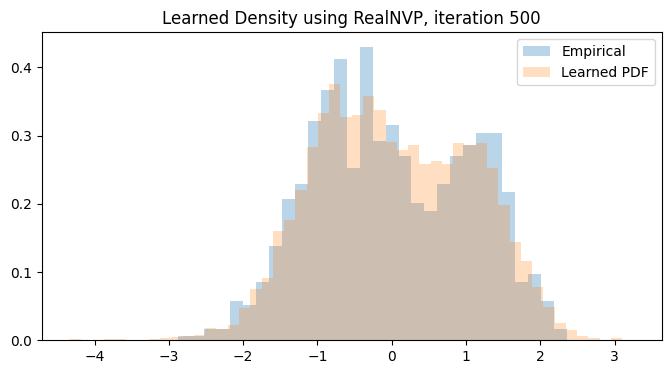

Epoch 600: Avg Loss per epoch = 2.8094,... final loss of training: 2.8094,
Epoch 600, Gradient Norm: 3.7844


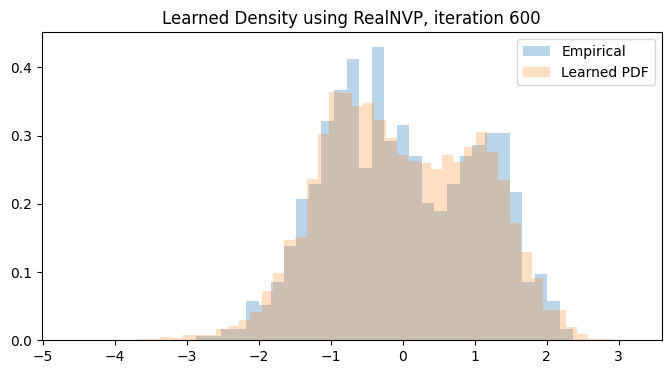

Epoch 700: Avg Loss per epoch = 2.8145,... final loss of training: 2.8145,
Epoch 700, Gradient Norm: 6.4031


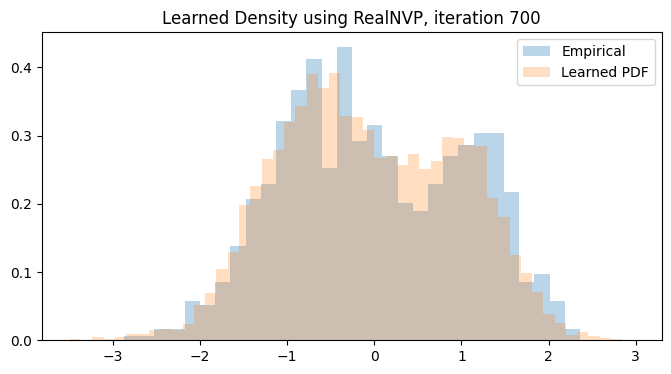

Epoch 800: Avg Loss per epoch = 2.7909,... final loss of training: 2.7909,
Epoch 800, Gradient Norm: 2.2642


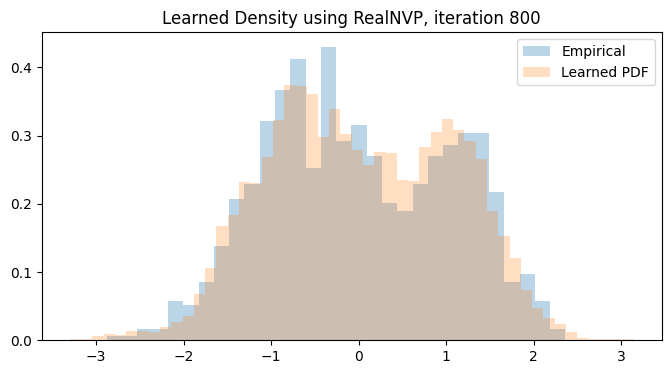

Epoch 900: Avg Loss per epoch = 2.7923,... final loss of training: 2.7923,
Epoch 900, Gradient Norm: 3.2900


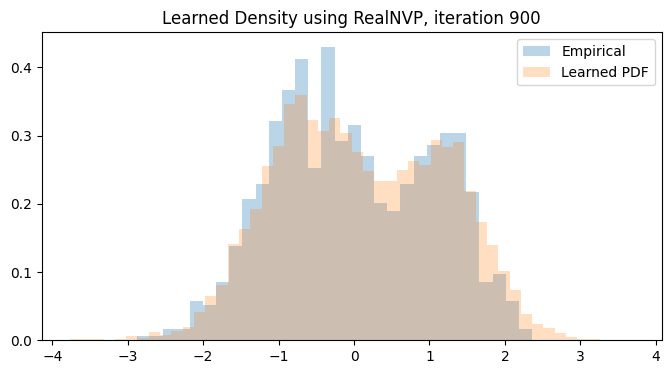

Epoch 1000: Avg Loss per epoch = 2.7929,... final loss of training: 2.7929,
Epoch 1000, Gradient Norm: 3.6405


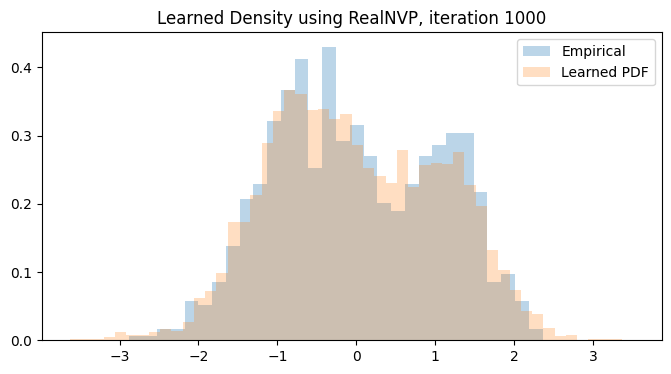

In [15]:
var = torch.tensor(np.array([y,noise]), dtype=torch.float32 )
flow_aug_ = train_SimpleRealNV(x = var, multivar_x= True, n_epoch= 1100)

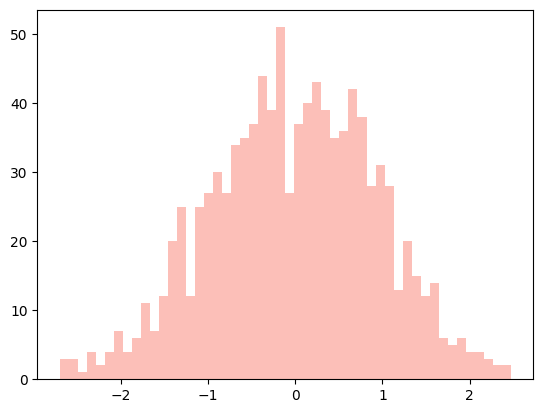

In [16]:
# calculate transform variable with aprox normal distribution
with torch.no_grad():
    transf_x, logabsdet = flow_aug_._transform(var.T) 

# plot transform variable y0
plt.hist(transf_x[:,0], bins=50, alpha=0.5, color='salmon' )
plt.show()

### After some experiments, I noticed that it is better to aggregate a new noise vector to the single variable and then estimate the loss function. This process lets to get a better transformation of the single variable.

In [ ]:

def contruct_nn(features, hidden_features, num_layers, num_blocks_per_layer,
                use_volume_preserving = False, batch_norm_within_layers = False,
                batch_norm_between_layers = False,
                activation = relu, dropout_probability = 0):

    # define nn design
    model_flow_SimpleRealNVP = SimpleRealNVP(
        features                = features,
        hidden_features         = hidden_features,
        num_layers              = num_layers,
        num_blocks_per_layer    = num_blocks_per_layer,
        use_volume_preserving   = use_volume_preserving, # False: affinity coupling
        activation              = activation,
        dropout_probability     = dropout_probability,
        batch_norm_within_layers= batch_norm_within_layers,
        batch_norm_between_layers=batch_norm_between_layers
    )
    
    return model_flow_SimpleRealNVP


def mod_opt_joint_loglik(model,
            train_loader,
            n_epochs=500,
            lr=1e-3,
            lr_min=None,
            optimizer='Adam',
            scheduler='exp'):
    
    # assert lr value
    if lr_min is None:  # don't decay lr
        lr_min = lr

    # number of obs.
    N = len(train_loader.dataset)
    
    # set up model optimizer
    if optimizer == 'Adam':
        optimizer = Adam(model.parameters(), lr=lr)
    elif optimizer == 'SGD':
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9)
    else:
        raise ValueError(f'Invalid optimizer {optimizer}')
    
    # set up scheduler for lr decay
    n_steps = n_epochs * len(train_loader)
    if scheduler == 'exp':
        min_lr_factor = lr_min / lr
        gamma = np.exp(np.log(min_lr_factor) / n_steps)
        scheduler = ExponentialLR(optimizer, gamma=gamma)
    elif scheduler == 'cos':
        scheduler = CosineAnnealingLR(optimizer, n_steps, eta_min=lr_min)
    else:
        raise ValueError(f'Invalid scheduler {scheduler}')
    
    # list to store results
    losses = list()

    for epoch in range(1, n_epochs + 1):
        epoch_loss = 0

        # standard NN training per batch
        for batch in train_loader:
            if isinstance(batch, (tuple, list)):
                batch = batch[0]
            else:
                batch = batch

            optimizer.zero_grad()
            
            # estimate mean loss
            loss = - (model.log_prob(batch).sum()) / N  # N: [n obs.]

            # Backward pass
            loss.backward()

            total_norm = sum(p.grad.data.norm(2).item()**2 for p in model.parameters() if p.grad is not None)**0.5

            # updates the model's parameters
            optimizer.step()

            # sum losses for all bacthes
            epoch_loss += loss.cpu().item() / len(train_loader)    

            # update scheduler
            scheduler.step()

        losses.append(epoch_loss * N)
        print(f"Epoch {epoch}: loss training: {loss:.4f},... Gradient Norm: {total_norm:.4f}")

    return model, losses

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)


def compute_marginal_likelihood_nn(x, n_steps=None, seed=711, device='cpu'):
    """
    Estimate the marginal log-likelihood of a 1D variable `x` using an 
    augmented normalizing flow (RealNVP-based), where noise is added 
    to project the 1D variable into a higher-dimensional space.

    The function:
    - Adds independent Gaussian noise to `x` to create a 2D input [x, e]
    - Trains a RealNVP normalizing flow model on the joint distribution p(x, e)
    - Uses the change-of-variable formula to estimate log p(x)
      via log p(x) = log p(x, e) - log p(e)
    - Returns the average marginal log-likelihood per sample

    Parameters
    ----------
    x : array-like of shape (n,)
        The 1D input data whose marginal density is to be estimated.
    n_steps : int, optional
        Number of training epochs (default is 5000).
    seed : int, default=711
        Random seed for reproducibility.
    device : str, default='cpu'
        Device to use for training ('cpu' or 'cuda').

    Returns
    -------
    marg_log_lik : float
        The estimated average marginal log-likelihood per sample for x.
    model : nn.Module
        The trained normalizing flow model (fitted on [x, noise]).
    new_x : torch.Tensor of shape (n, 2)
        The augmented data matrix used during training (original x and noise).
    """
    n_steps = 5000 if n_steps is None else n_steps

    # define new matrix with additional noise
    # generate random noise
    set_seed(seed)
    n = len(x) 
    noise = torch.randn(n)  # mean 0, std 1 by default
    new_x = torch.tensor(np.stack([x, noise], axis=1), dtype=torch.float32)
    
    # define parameters for the flow design
    map_kwargs = dict(
        features                = new_x.shape[1],
        hidden_features         = 64,
        num_layers              = 6,
        num_blocks_per_layer    = 4,
        use_volume_preserving   = False, # False: affinity coupling
        activation              = relu,
        dropout_probability     = 0,
        batch_norm_within_layers= False,
        batch_norm_between_layers=False
    )
    
    # define data batches
    loader = DataLoader(
        TensorDataset(new_x), 
        batch_size=len(x),
        shuffle=False
    )
        
    # set flow and nn parameter
    flow_nn = contruct_nn(**map_kwargs)

    # estimation
    model, losses = mod_opt_joint_loglik(
                        model           = flow_nn,
                        train_loader    = loader,
                        n_epochs        = n_steps,
                        lr              = 1e-2,
                        lr_min          = 1e-6,
                        optimizer       = 'Adam',
                        scheduler       = 'exp'
    )

    joint_log_lik = - np.nanmin(losses)
    log_prob_noise = (-0.5 * noise.numpy()**2 - 0.5 * np.log(2 * np.pi)).sum()
    marg_log_lik = (joint_log_lik - log_prob_noise) / len(x)

    return marg_log_lik, model, new_x 

In [59]:
log_lik_marg, flow_model, mat = compute_marginal_likelihood_nn(x = x,  n_steps=1000, seed=711, device='cpu' )

Epoch 1: loss training: 3.5056,... Gradient Norm: 7.0747
Epoch 2: loss training: 120.5641,... Gradient Norm: 1372.0607
Epoch 3: loss training: 9.3453,... Gradient Norm: 79.3654
Epoch 4: loss training: 32.6629,... Gradient Norm: 404.1977
Epoch 5: loss training: 13.3740,... Gradient Norm: 118.2449
Epoch 6: loss training: 10.6215,... Gradient Norm: 59.4674
Epoch 7: loss training: 11.9939,... Gradient Norm: 100.9173
Epoch 8: loss training: 7.2389,... Gradient Norm: 31.9358
Epoch 9: loss training: 5.2544,... Gradient Norm: 24.8780
Epoch 10: loss training: 4.0854,... Gradient Norm: 10.1568
Epoch 11: loss training: 4.0477,... Gradient Norm: 10.2384
Epoch 12: loss training: 4.4805,... Gradient Norm: 17.5710
Epoch 13: loss training: 4.6511,... Gradient Norm: 19.1036
Epoch 14: loss training: 4.4699,... Gradient Norm: 16.1959
Epoch 15: loss training: 4.1469,... Gradient Norm: 11.4120
Epoch 16: loss training: 3.9182,... Gradient Norm: 8.6553
Epoch 17: loss training: 3.8537,... Gradient Norm: 8.101

In [60]:
log_lik_marg

-1.306328769683838

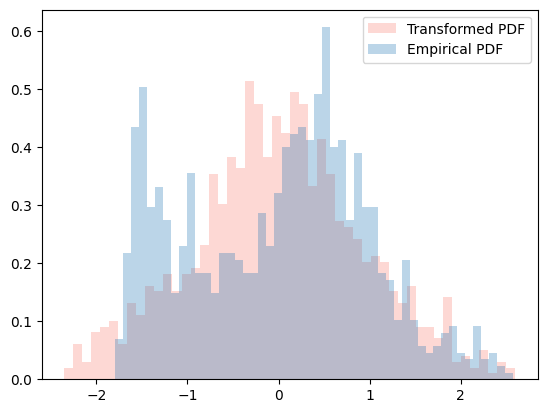

In [63]:
# calculate transform variable with aprox normal distribution
with torch.no_grad():
    transf_mat, logabsdet_mat = flow_model._transform(mat) 

# plot transform original variable
plt.hist(transf_mat[:,0], bins=50, density=True, alpha=0.3, linewidth=2, color='salmon', label = "Transformed PDF")
plt.hist(x, bins=50, density=True, alpha=0.3, label="Empirical PDF")
plt.legend()

plt.show()

In [84]:
# ts = torch.tensor([1.0, 2.0, 3.0, 4,8,9,10,88,95,40])

# ttt = torch.tensor([[1.0, 2.0],
#      [3.0, 4.0]])

In [85]:
# ts = ts.reshape(-1, 2)

# mask: a 1-dim tensor, tuple or list. It indexes inputs as follows:
#     * If `mask[i] > 0`, `input[i]` will be transformed.  -------- 1
#     * If `mask[i] <= 0`, `input[i]` will be passed unchanged. --- 0

In [82]:
# import pandas as pd
# (pd.Series([1,0]) <= 0).values
# torch.tensor( (pd.Series([1,0]) <= 0).values)
# ts

In [83]:
# ts.masked_select(torch.tensor([1.0, 0.0]) >0)

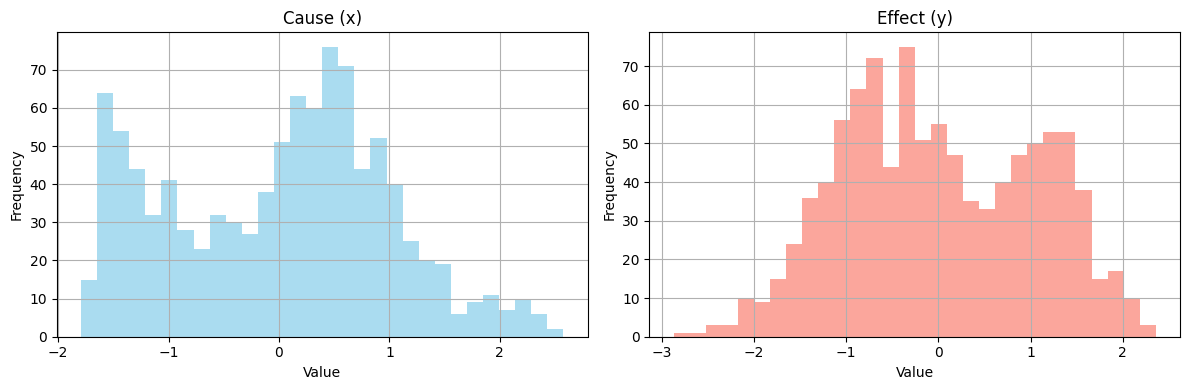

In [123]:
# We use the MNU pair 55 as an example and standardize the data
# dataset = MNU(100, preprocessor=None, double=True)
# dataset = Tuebingen(108, preprocessor=None, double=True)
dataset = SIM(100, preprocessor=None, double=True)
# dataset = SIMc(90, preprocessor=None, double=True)
# dataset = SIMG(100, preprocessor=None, double=True)
# dataset = SIMln(100, preprocessor=None, double=True)
# dataset = Cha(300, preprocessor=None, double=True)
# dataset = Multi(300, preprocessor=None, double=True)
# dataset = Net(300, preprocessor=None, double=True)
x, y = dataset.cause.flatten().numpy(), dataset.effect.flatten().numpy()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for x
axes[0].hist(x, bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Cause (x)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Histogram for y
axes[1].hist(y, bins=30, alpha=0.7, color='salmon')
axes[1].set_title('Effect (y)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

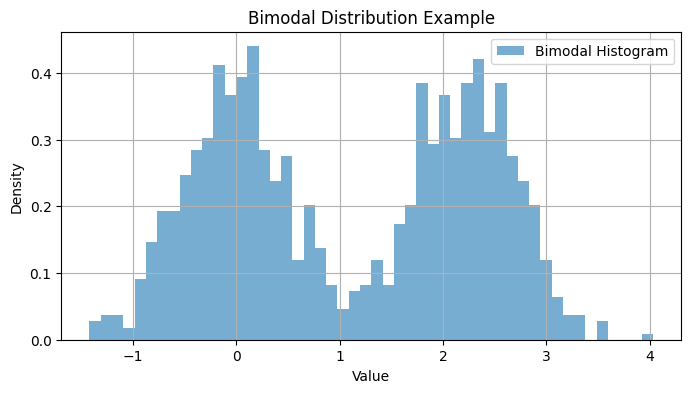

In [170]:
# Generate samples from two Gaussians
import numpy as np
# First normal distribution: mean = 0, std = 0.5
data1 = np.random.normal(loc=0.0, scale=0.5, size=500)

# Second normal distribution: mean = 1.5, std = 0.5
data2 = np.random.normal(loc=2.2, scale=0.5, size=500)

# Combine into a single bimodal vector
bimodal_vector = np.concatenate([data1, data2])
np.random.shuffle(bimodal_vector)

# Plot it
plt.figure(figsize=(8, 4))
plt.hist(bimodal_vector, bins=50, density=True, alpha=0.6, label="Bimodal Histogram")
plt.title("Bimodal Distribution Example")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

In [243]:
# n = len(yt)

# Find a batch size that divides n exactly (e.g., 5, 10, 20, 50, etc.)
# You can pick the largest factor under a certain threshold
# possible_batch_sizes = [i for i in range(1, n+1) if n % i == 0]
# print(f"Possible equal batch sizes for n={n}: {possible_batch_sizes}")

Epoch 0, Gradient Norm: 0.6710
Epoch 0: Avg Loss per epoch = 2.1850,... final loss of training: 2.1850,


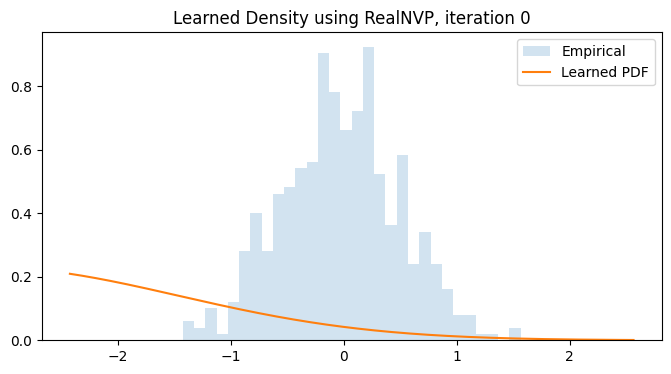

Epoch 1, Gradient Norm: 11.6829
Epoch 1: Avg Loss per epoch = 3.1805,... final loss of training: 3.1805,
Epoch 2, Gradient Norm: 14.7060
Epoch 2: Avg Loss per epoch = 5.2218,... final loss of training: 5.2218,
Epoch 3, Gradient Norm: 4.6090
Epoch 3: Avg Loss per epoch = 2.3852,... final loss of training: 2.3852,
Epoch 4, Gradient Norm: 0.5386
Epoch 4: Avg Loss per epoch = 1.8558,... final loss of training: 1.8558,
Epoch 5, Gradient Norm: 3.0604
Epoch 5: Avg Loss per epoch = 2.1478,... final loss of training: 2.1478,
Epoch 6, Gradient Norm: 3.0037
Epoch 6: Avg Loss per epoch = 2.1431,... final loss of training: 2.1431,
Epoch 7, Gradient Norm: 1.9495
Epoch 7: Avg Loss per epoch = 1.9469,... final loss of training: 1.9469,
Epoch 8, Gradient Norm: 0.9222
Epoch 8: Avg Loss per epoch = 1.7951,... final loss of training: 1.7951,
Epoch 9, Gradient Norm: 0.5361
Epoch 9: Avg Loss per epoch = 1.7244,... final loss of training: 1.7244,
Epoch 10, Gradient Norm: 1.4110
Epoch 10: Avg Loss per epoch =

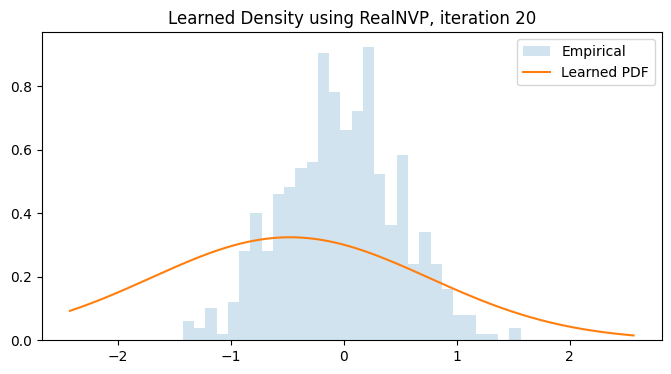

Epoch 21, Gradient Norm: 3.2649
Epoch 21: Avg Loss per epoch = 1.2789,... final loss of training: 1.2789,
Epoch 22, Gradient Norm: 1.6629
Epoch 22: Avg Loss per epoch = 1.1973,... final loss of training: 1.1973,
Epoch 23, Gradient Norm: 3.5901
Epoch 23: Avg Loss per epoch = 1.2100,... final loss of training: 1.2100,
Epoch 24, Gradient Norm: 2.0183
Epoch 24: Avg Loss per epoch = 1.1473,... final loss of training: 1.1473,
Epoch 25, Gradient Norm: 4.0957
Epoch 25: Avg Loss per epoch = 1.1695,... final loss of training: 1.1695,
Epoch 26, Gradient Norm: 1.1655
Epoch 26: Avg Loss per epoch = 1.1017,... final loss of training: 1.1017,
Epoch 27, Gradient Norm: 5.3785
Epoch 27: Avg Loss per epoch = 1.1614,... final loss of training: 1.1614,
Epoch 28, Gradient Norm: 2.0565
Epoch 28: Avg Loss per epoch = 1.0875,... final loss of training: 1.0875,
Epoch 29, Gradient Norm: 4.1625
Epoch 29: Avg Loss per epoch = 1.1097,... final loss of training: 1.1097,
Epoch 30, Gradient Norm: 4.7414
Epoch 30: Avg 

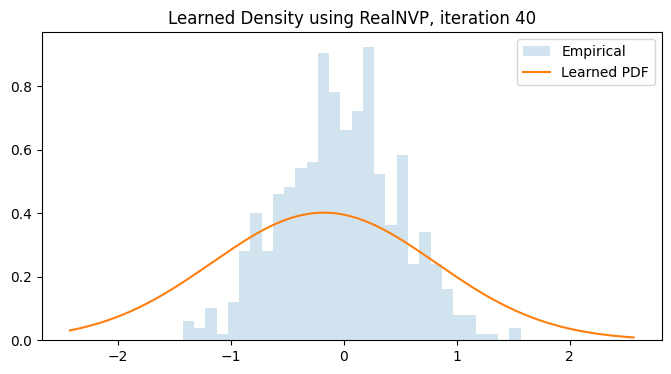

Epoch 41, Gradient Norm: 2.3847
Epoch 41: Avg Loss per epoch = 1.0564,... final loss of training: 1.0564,
Epoch 42, Gradient Norm: 1.6411
Epoch 42: Avg Loss per epoch = 1.0506,... final loss of training: 1.0506,
Epoch 43, Gradient Norm: 3.0489
Epoch 43: Avg Loss per epoch = 1.0635,... final loss of training: 1.0635,
Epoch 44, Gradient Norm: 0.1945
Epoch 44: Avg Loss per epoch = 1.0454,... final loss of training: 1.0454,
Epoch 45, Gradient Norm: 2.5169
Epoch 45: Avg Loss per epoch = 1.0583,... final loss of training: 1.0583,
Epoch 46, Gradient Norm: 1.1871
Epoch 46: Avg Loss per epoch = 1.0482,... final loss of training: 1.0482,
Epoch 47, Gradient Norm: 1.7540
Epoch 47: Avg Loss per epoch = 1.0517,... final loss of training: 1.0517,
Epoch 48, Gradient Norm: 1.6390
Epoch 48: Avg Loss per epoch = 1.0511,... final loss of training: 1.0511,
Epoch 49, Gradient Norm: 1.0219
Epoch 49: Avg Loss per epoch = 1.0475,... final loss of training: 1.0475,
Epoch 50, Gradient Norm: 1.7474
Epoch 50: Avg 

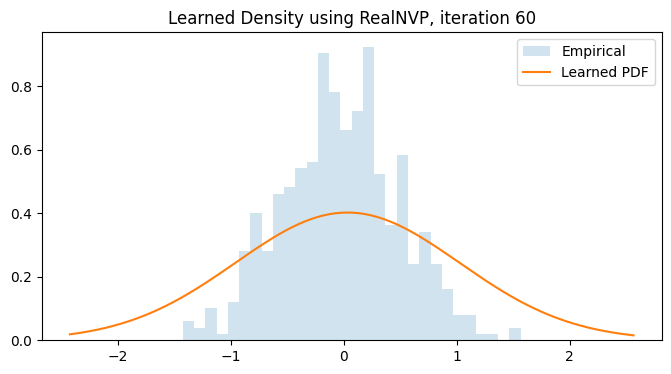

Epoch 61, Gradient Norm: 0.9229
Epoch 61: Avg Loss per epoch = 1.0468,... final loss of training: 1.0468,
Epoch 62, Gradient Norm: 0.3028
Epoch 62: Avg Loss per epoch = 1.0450,... final loss of training: 1.0450,
Epoch 63, Gradient Norm: 0.9343
Epoch 63: Avg Loss per epoch = 1.0468,... final loss of training: 1.0468,
Epoch 64, Gradient Norm: 0.0496
Epoch 64: Avg Loss per epoch = 1.0447,... final loss of training: 1.0447,
Epoch 65, Gradient Norm: 0.8418
Epoch 65: Avg Loss per epoch = 1.0463,... final loss of training: 1.0463,
Epoch 66, Gradient Norm: 0.3848
Epoch 66: Avg Loss per epoch = 1.0449,... final loss of training: 1.0449,
Epoch 67, Gradient Norm: 0.6011
Epoch 67: Avg Loss per epoch = 1.0454,... final loss of training: 1.0454,
Epoch 68, Gradient Norm: 0.6310
Epoch 68: Avg Loss per epoch = 1.0454,... final loss of training: 1.0454,
Epoch 69, Gradient Norm: 0.2423
Epoch 69: Avg Loss per epoch = 1.0446,... final loss of training: 1.0446,
Epoch 70, Gradient Norm: 0.7031
Epoch 70: Avg 

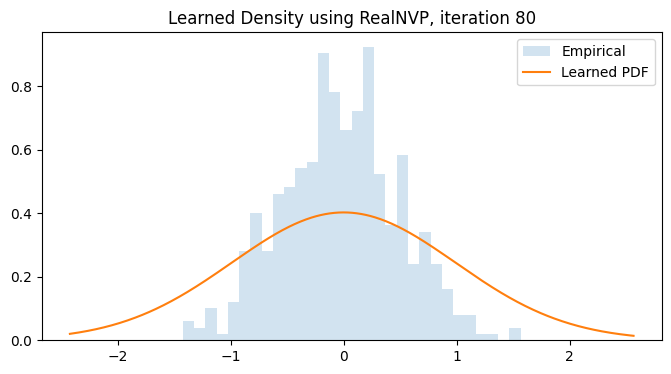

Epoch 81, Gradient Norm: 0.4506
Epoch 81: Avg Loss per epoch = 1.0445,... final loss of training: 1.0445,
Epoch 82, Gradient Norm: 0.1826
Epoch 82: Avg Loss per epoch = 1.0441,... final loss of training: 1.0441,
Epoch 83, Gradient Norm: 0.2237
Epoch 83: Avg Loss per epoch = 1.0442,... final loss of training: 1.0442,
Epoch 84, Gradient Norm: 0.4120
Epoch 84: Avg Loss per epoch = 1.0444,... final loss of training: 1.0444,
Epoch 85, Gradient Norm: 0.2570
Epoch 85: Avg Loss per epoch = 1.0441,... final loss of training: 1.0441,
Epoch 86, Gradient Norm: 0.0770
Epoch 86: Avg Loss per epoch = 1.0440,... final loss of training: 1.0440,
Epoch 87, Gradient Norm: 0.3320
Epoch 87: Avg Loss per epoch = 1.0442,... final loss of training: 1.0442,
Epoch 88, Gradient Norm: 0.3535
Epoch 88: Avg Loss per epoch = 1.0442,... final loss of training: 1.0442,
Epoch 89, Gradient Norm: 0.1703
Epoch 89: Avg Loss per epoch = 1.0440,... final loss of training: 1.0440,
Epoch 90, Gradient Norm: 0.0903
Epoch 90: Avg 

In [245]:
# x = y
# torch.min(torch.tensor(x, dtype=torch.float32).reshape(-1, 1))-1
# features = 5
# mask_ = torch.ones(features)
# mask_[::2] = -1
yt = torch.tensor(data1, dtype=torch.float32).reshape(-1, 1)
tss = SimpleRealNVP(features = yt.shape[1] ,
        hidden_features = 256,
        num_layers = 20,
        num_blocks_per_layer = 4,
        use_volume_preserving=False,
        activation= F.relu,
        dropout_probability=0,
        batch_norm_within_layers=False,
        batch_norm_between_layers=False,
    )

optimizer = torch.optim.Adam(tss.parameters(), lr=5e-3)
tss.train()
batch_size_ = yt.shape[0] # or anything suitable
data_loader = DataLoader(
    TensorDataset(yt),
    batch_size=batch_size_,
    shuffle=False
)

N = len(data_loader.dataset)

for epoch in range(100):
    epoch_loss = 0

    for batch in data_loader:
        batch_x = batch[0]
        optimizer.zero_grad()

        loss = (-tss.log_prob(batch_x).sum()) / N  # shape: [batch_size]

        # Backward pass
        loss.backward()

        total_norm = sum(p.grad.data.norm(2).item()**2 for p in tss.parameters() if p.grad is not None)**0.5
        print(f"Epoch {epoch}, Gradient Norm: {total_norm:.4f}")

        optimizer.step()
        epoch_loss += loss.cpu().item() / len(data_loader)    
    
    print(f"Epoch {epoch}: Avg Loss per epoch = {epoch_loss:.4f},... final loss of training: {loss:.4f},")

    # Visualize learned PDF every 100 epochs
    if epoch % 20 == 0:
        xline = torch.linspace(torch.min(yt.flatten()) - 1, torch.max(yt.flatten()) + 1, 500).reshape(-1, 1)
        with torch.no_grad():
            log_probs = tss.log_prob(xline)
            probs = torch.exp(log_probs)
        plt.figure(figsize=(8, 4))
        plt.hist(yt.numpy(), bins=30, density=True, alpha=0.2, label="Empirical")
        plt.plot(xline.numpy(), probs.numpy(), label="Learned PDF")
        plt.legend()
        plt.title(f"Learned Density using RealNVP, iteration {epoch}")
        plt.show()


Epoch 999: Loss = 1.6447


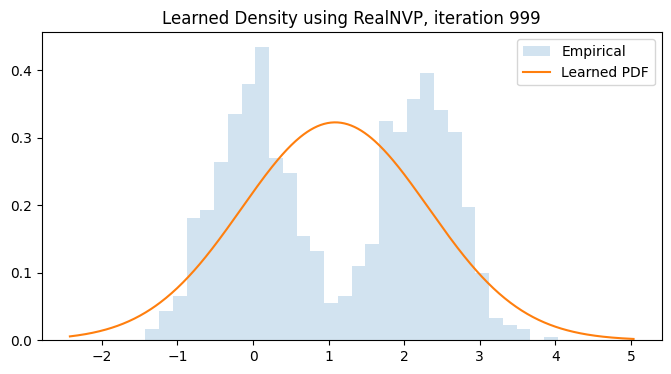

In [231]:
print(f"Epoch {epoch}: Loss = {loss.item():.4f}")
xline = torch.linspace(torch.min(yt.flatten())-1,  torch.max(yt.flatten())+1, 500).reshape(-1, 1)
with torch.no_grad():
    log_probs = tss.log_prob(xline)
    probs = torch.exp(log_probs)
plt.figure(figsize=(8, 4))
plt.hist(yt.numpy(), bins=30, density=True, alpha=0.2, label="Empirical")
plt.plot(xline.numpy(), probs.numpy(), label="Learned PDF")
plt.legend()
plt.title(f"Learned Density using RealNVP, iteration {epoch}")
plt.show()

In [221]:
total_norm = 0.0
for p in tss.parameters():
    param_norm = p.grad.data.norm(2)
    total_norm += param_norm.item() ** 2
total_norm = total_norm ** 0.5
print(f"Gradient Norm: {total_norm:.4f}")

Gradient Norm: 0.0000


In [211]:
# loss.backward()
total_norm = 0.0
for p in tss.parameters():
    if p.grad is not None:
        param_norm = p.grad.data.norm(2)
        total_norm += param_norm.item() ** 2
total_norm = total_norm ** 0.5
print(f"Gradient Norm: {total_norm:.4f}")  # log this *before* optimizer.step()
optimizer.step()


Gradient Norm: 0.0000


In [277]:
# p.grad
torch.ones(bimodal_vector.shape[0])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [ ]:
# flow.log_prob(inputs=x).shape

torch.Size([1000])

Epoch 0.. final loss of training: 4.5644,
Epoch 1.. final loss of training: 3.9480,
Epoch 2.. final loss of training: 3.5535,
Epoch 3.. final loss of training: 3.2847,
Epoch 4.. final loss of training: 3.1018,
Epoch 5.. final loss of training: 3.0056,
Epoch 6.. final loss of training: 3.0018,
Epoch 7.. final loss of training: 3.0695,
Epoch 8.. final loss of training: 3.1220,
Epoch 9.. final loss of training: 3.0946,
Epoch 10.. final loss of training: 3.0144,
Epoch 11.. final loss of training: 2.9278,
Epoch 12.. final loss of training: 2.8607,
Epoch 13.. final loss of training: 2.8163,
Epoch 14.. final loss of training: 2.7864,
Epoch 15.. final loss of training: 2.7616,
Epoch 16.. final loss of training: 2.7374,
Epoch 17.. final loss of training: 2.7141,
Epoch 18.. final loss of training: 2.6929,
Epoch 19.. final loss of training: 2.6727,
Epoch 20.. final loss of training: 2.6514,
Epoch 21.. final loss of training: 2.6310,
Epoch 22.. final loss of training: 2.6193,
Epoch 23.. final loss

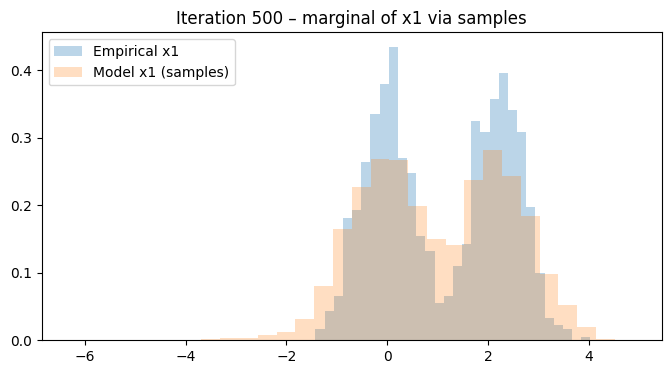

Epoch 500.. final loss of training: 2.2915,
Epoch 501.. final loss of training: 2.2897,
Epoch 502.. final loss of training: 2.2889,
Epoch 503.. final loss of training: 2.2888,
Epoch 504.. final loss of training: 2.2887,
Epoch 505.. final loss of training: 2.2892,
Epoch 506.. final loss of training: 2.2904,
Epoch 507.. final loss of training: 2.2948,
Epoch 508.. final loss of training: 2.2949,
Epoch 509.. final loss of training: 2.2903,
Epoch 510.. final loss of training: 2.2886,
Epoch 511.. final loss of training: 2.2953,
Epoch 512.. final loss of training: 2.2963,
Epoch 513.. final loss of training: 2.2886,
Epoch 514.. final loss of training: 2.2889,
Epoch 515.. final loss of training: 2.2903,
Epoch 516.. final loss of training: 2.2905,
Epoch 517.. final loss of training: 2.2919,
Epoch 518.. final loss of training: 2.2928,
Epoch 519.. final loss of training: 2.2884,
Epoch 520.. final loss of training: 2.2895,
Epoch 521.. final loss of training: 2.2954,
Epoch 522.. final loss of traini

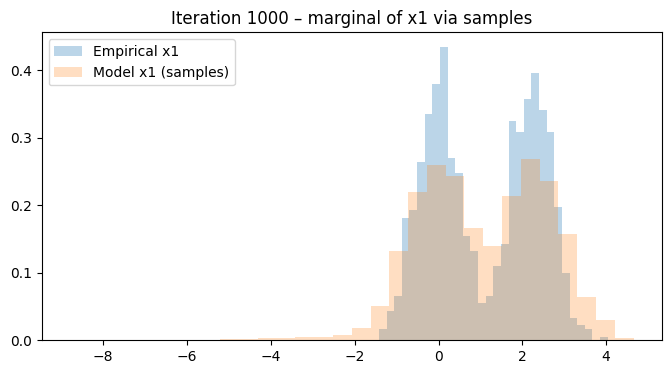

Epoch 1000.. final loss of training: 2.2894,
Epoch 1001.. final loss of training: 2.2829,
Epoch 1002.. final loss of training: 2.2787,
Epoch 1003.. final loss of training: 2.2776,
Epoch 1004.. final loss of training: 2.2787,
Epoch 1005.. final loss of training: 2.2792,
Epoch 1006.. final loss of training: 2.2781,
Epoch 1007.. final loss of training: 2.2803,
Epoch 1008.. final loss of training: 2.2766,
Epoch 1009.. final loss of training: 2.2762,
Epoch 1010.. final loss of training: 2.2758,
Epoch 1011.. final loss of training: 2.2763,
Epoch 1012.. final loss of training: 2.2785,
Epoch 1013.. final loss of training: 2.2819,
Epoch 1014.. final loss of training: 2.2778,
Epoch 1015.. final loss of training: 2.2803,
Epoch 1016.. final loss of training: 2.2914,
Epoch 1017.. final loss of training: 2.2840,
Epoch 1018.. final loss of training: 2.2938,
Epoch 1019.. final loss of training: 2.2829,
Epoch 1020.. final loss of training: 2.2908,
Epoch 1021.. final loss of training: 2.2827,
Epoch 1022

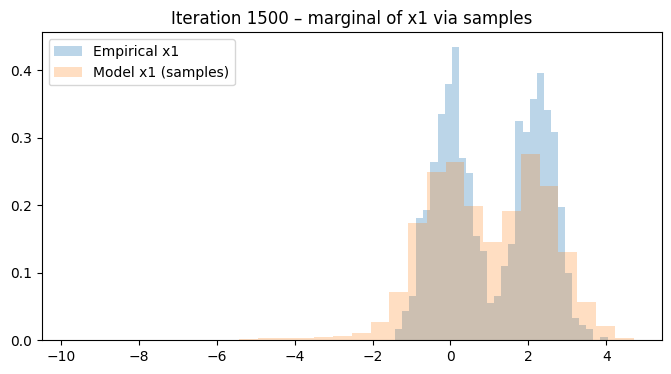

Epoch 1500.. final loss of training: 2.2786,
Epoch 1501.. final loss of training: 2.2857,
Epoch 1502.. final loss of training: 2.2776,
Epoch 1503.. final loss of training: 2.2819,
Epoch 1504.. final loss of training: 2.2900,
Epoch 1505.. final loss of training: 2.2784,
Epoch 1506.. final loss of training: 2.2940,
Epoch 1507.. final loss of training: 2.2787,
Epoch 1508.. final loss of training: 2.2841,
Epoch 1509.. final loss of training: 2.2828,
Epoch 1510.. final loss of training: 2.2739,
Epoch 1511.. final loss of training: 2.2815,
Epoch 1512.. final loss of training: 2.2727,
Epoch 1513.. final loss of training: 2.2752,
Epoch 1514.. final loss of training: 2.2775,
Epoch 1515.. final loss of training: 2.2730,
Epoch 1516.. final loss of training: 2.2786,
Epoch 1517.. final loss of training: 2.2751,
Epoch 1518.. final loss of training: 2.2719,
Epoch 1519.. final loss of training: 2.2759,
Epoch 1520.. final loss of training: 2.2719,
Epoch 1521.. final loss of training: 2.2727,
Epoch 1522

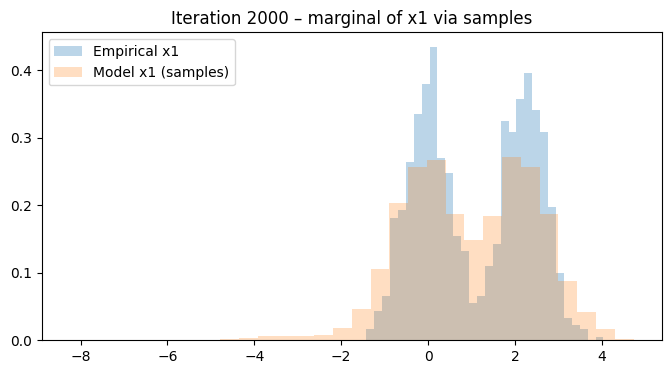

Epoch 2000.. final loss of training: 2.2820,
Epoch 2001.. final loss of training: 2.2779,
Epoch 2002.. final loss of training: 2.2714,
Epoch 2003.. final loss of training: 2.2853,
Epoch 2004.. final loss of training: 2.2767,
Epoch 2005.. final loss of training: 2.2735,
Epoch 2006.. final loss of training: 2.2859,
Epoch 2007.. final loss of training: 2.2694,
Epoch 2008.. final loss of training: 2.2753,
Epoch 2009.. final loss of training: 2.2695,
Epoch 2010.. final loss of training: 2.2744,
Epoch 2011.. final loss of training: 2.2713,
Epoch 2012.. final loss of training: 2.2713,
Epoch 2013.. final loss of training: 2.2703,
Epoch 2014.. final loss of training: 2.2723,
Epoch 2015.. final loss of training: 2.2708,
Epoch 2016.. final loss of training: 2.2698,
Epoch 2017.. final loss of training: 2.2723,
Epoch 2018.. final loss of training: 2.2686,
Epoch 2019.. final loss of training: 2.2703,
Epoch 2020.. final loss of training: 2.2710,
Epoch 2021.. final loss of training: 2.2685,
Epoch 2022

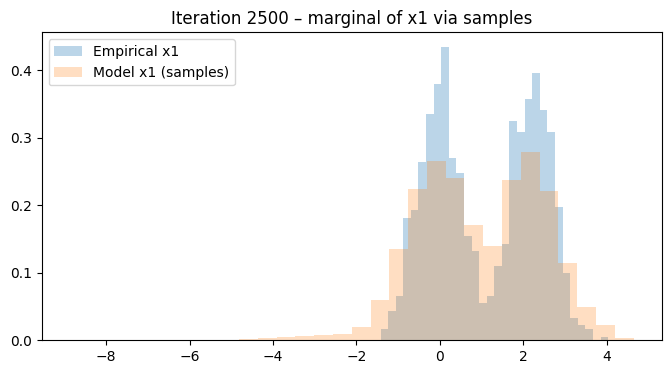

Epoch 2500.. final loss of training: 2.2674,
Epoch 2501.. final loss of training: 2.2638,
Epoch 2502.. final loss of training: 2.2666,
Epoch 2503.. final loss of training: 2.2629,
Epoch 2504.. final loss of training: 2.2602,
Epoch 2505.. final loss of training: 2.2613,
Epoch 2506.. final loss of training: 2.2604,
Epoch 2507.. final loss of training: 2.2584,
Epoch 2508.. final loss of training: 2.2605,
Epoch 2509.. final loss of training: 2.2617,
Epoch 2510.. final loss of training: 2.2660,
Epoch 2511.. final loss of training: 2.2779,
Epoch 2512.. final loss of training: 2.2651,
Epoch 2513.. final loss of training: 2.2715,
Epoch 2514.. final loss of training: 2.2951,
Epoch 2515.. final loss of training: 2.2672,
Epoch 2516.. final loss of training: 2.3031,
Epoch 2517.. final loss of training: 2.2797,
Epoch 2518.. final loss of training: 2.2920,
Epoch 2519.. final loss of training: 2.2761,
Epoch 2520.. final loss of training: 2.2744,
Epoch 2521.. final loss of training: 2.2845,
Epoch 2522

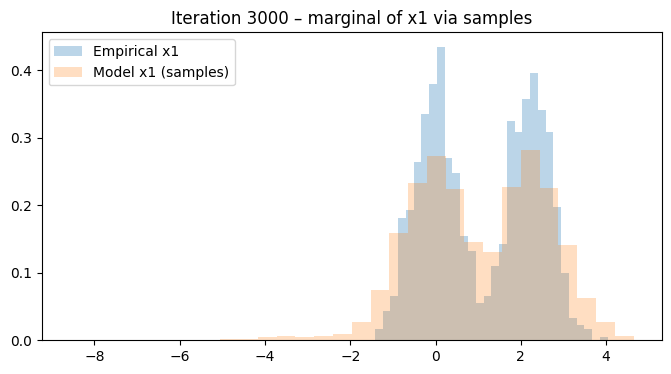

Epoch 3000.. final loss of training: 2.2648,
Epoch 3001.. final loss of training: 2.2586,
Epoch 3002.. final loss of training: 2.2548,
Epoch 3003.. final loss of training: 2.2590,
Epoch 3004.. final loss of training: 2.2508,
Epoch 3005.. final loss of training: 2.2604,
Epoch 3006.. final loss of training: 2.2770,
Epoch 3007.. final loss of training: 2.2535,
Epoch 3008.. final loss of training: 2.2724,
Epoch 3009.. final loss of training: 2.2679,
Epoch 3010.. final loss of training: 2.2551,
Epoch 3011.. final loss of training: 2.2698,
Epoch 3012.. final loss of training: 2.2584,
Epoch 3013.. final loss of training: 2.2721,
Epoch 3014.. final loss of training: 2.2564,
Epoch 3015.. final loss of training: 2.2630,
Epoch 3016.. final loss of training: 2.2576,
Epoch 3017.. final loss of training: 2.2590,
Epoch 3018.. final loss of training: 2.2558,
Epoch 3019.. final loss of training: 2.2505,
Epoch 3020.. final loss of training: 2.2567,
Epoch 3021.. final loss of training: 2.2570,
Epoch 3022

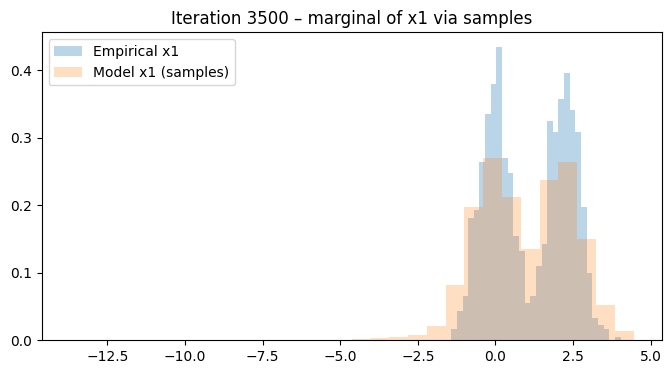

Epoch 3500.. final loss of training: 2.2641,
Epoch 3501.. final loss of training: 2.2635,
Epoch 3502.. final loss of training: 2.2511,
Epoch 3503.. final loss of training: 2.2489,
Epoch 3504.. final loss of training: 2.2566,
Epoch 3505.. final loss of training: 2.2529,
Epoch 3506.. final loss of training: 2.2478,
Epoch 3507.. final loss of training: 2.2503,
Epoch 3508.. final loss of training: 2.2476,
Epoch 3509.. final loss of training: 2.2513,
Epoch 3510.. final loss of training: 2.2526,
Epoch 3511.. final loss of training: 2.2541,
Epoch 3512.. final loss of training: 2.2561,
Epoch 3513.. final loss of training: 2.2475,
Epoch 3514.. final loss of training: 2.2473,
Epoch 3515.. final loss of training: 2.2611,
Epoch 3516.. final loss of training: 2.2474,
Epoch 3517.. final loss of training: 2.2570,
Epoch 3518.. final loss of training: 2.2497,
Epoch 3519.. final loss of training: 2.2603,
Epoch 3520.. final loss of training: 2.2468,
Epoch 3521.. final loss of training: 2.2541,
Epoch 3522

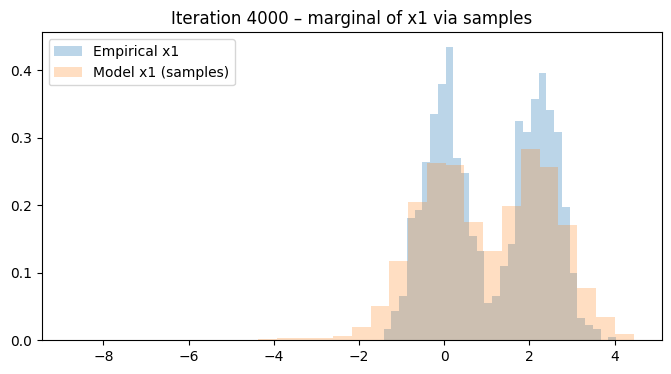

Epoch 4000.. final loss of training: 2.2520,
Epoch 4001.. final loss of training: 2.2604,
Epoch 4002.. final loss of training: 2.2486,
Epoch 4003.. final loss of training: 2.2566,
Epoch 4004.. final loss of training: 2.2642,
Epoch 4005.. final loss of training: 2.2474,
Epoch 4006.. final loss of training: 2.2686,
Epoch 4007.. final loss of training: 2.2596,
Epoch 4008.. final loss of training: 2.2500,
Epoch 4009.. final loss of training: 2.2769,
Epoch 4010.. final loss of training: 2.2483,
Epoch 4011.. final loss of training: 2.2560,
Epoch 4012.. final loss of training: 2.2683,
Epoch 4013.. final loss of training: 2.2482,
Epoch 4014.. final loss of training: 2.2575,
Epoch 4015.. final loss of training: 2.2673,
Epoch 4016.. final loss of training: 2.2460,
Epoch 4017.. final loss of training: 2.2622,
Epoch 4018.. final loss of training: 2.2522,
Epoch 4019.. final loss of training: 2.2533,
Epoch 4020.. final loss of training: 2.2522,
Epoch 4021.. final loss of training: 2.2493,
Epoch 4022

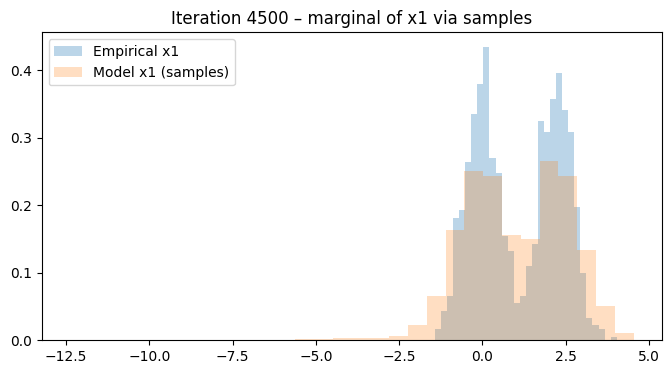

Epoch 4500.. final loss of training: 2.2439,
Epoch 4501.. final loss of training: 2.2409,
Epoch 4502.. final loss of training: 2.2411,
Epoch 4503.. final loss of training: 2.2388,
Epoch 4504.. final loss of training: 2.2464,
Epoch 4505.. final loss of training: 2.2770,
Epoch 4506.. final loss of training: 2.2502,
Epoch 4507.. final loss of training: 2.2478,
Epoch 4508.. final loss of training: 2.2647,
Epoch 4509.. final loss of training: 2.2420,
Epoch 4510.. final loss of training: 2.2525,
Epoch 4511.. final loss of training: 2.2511,
Epoch 4512.. final loss of training: 2.2413,
Epoch 4513.. final loss of training: 2.2594,
Epoch 4514.. final loss of training: 2.2595,
Epoch 4515.. final loss of training: 2.2718,
Epoch 4516.. final loss of training: 2.2629,
Epoch 4517.. final loss of training: 2.2623,
Epoch 4518.. final loss of training: 2.2674,
Epoch 4519.. final loss of training: 2.2451,
Epoch 4520.. final loss of training: 2.2526,
Epoch 4521.. final loss of training: 2.2588,
Epoch 4522

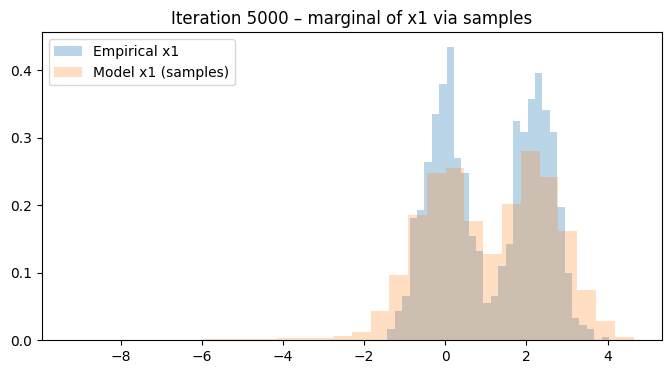

In [315]:
# tss.eval()
# with torch.no_grad():
#     z, logabsdet = tss._transform(yt) 

# for ix, p in enumerate(tss.parameters()):
#     print(ix, p.grad.data.norm(2),  p.grad.data.norm(2).item()**2)

# x = torch.tensor(bimodal_vector.reshape(-1, 1), dtype=torch.float32)
# torch.concat([x,torch.ones(bimodal_vector.shape[0]).reshape(-1, 1)], dim=1)
num_layers = 6
base_dist = StandardNormal(shape=[2])

mask = torch.ones(2)
mask[::2] = -1
# # mask: a 1-dim tensor, tuple or list. It indexes inputs as follows:
# #     * If `mask[i] > 0`, `input[i]` will be transformed.  -------- 1
# #     * If `mask[i] <= 0`, `input[i]` will be passed unchanged. --- 0

# # Define a conditioner network
def create_resnet(in_features, out_features):
    return ResidualNet(
        in_features=in_features,
        out_features=out_features,
        hidden_features=64,
        num_blocks=2,
        dropout_probability=0,
        use_batch_norm=False,
        activation= F.relu
    )


transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(AffineCouplingTransform(mask= mask, transform_net_create_fn=create_resnet))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



x = torch.tensor(bimodal_vector.reshape(-1, 1), dtype=torch.float32)
# x = torch.concat([x,torch.ones(bimodal_vector.shape[0]).reshape(-1, 1)], dim=1)
x = torch.concat([x,
                   torch.tensor(np.random.normal(loc=0.0, scale=0.5, size=bimodal_vector.shape[0]), dtype=torch.float32 ).reshape(-1, 1)], dim=1)
num_iter = 5000
for i in range(num_iter):
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    print(f"Epoch {i}.. final loss of training: {loss:.4f},")
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        with torch.no_grad():
            xs = flow.sample(50000).cpu().numpy()   # [N, 2]

        plt.figure(figsize=(8,4))
        plt.hist(x[:,0].cpu().numpy(), bins=30, density=True, alpha=0.3, label="Empirical x1")
        plt.hist(xs[:,0], bins=30, density=True, linewidth=2,alpha=0.25, label="Model x1 (samples)")
        plt.legend()
        plt.title(f"Iteration {i+1} – marginal of x1 via samples")
        plt.show()

Epoch 0.. final loss of training: 4.5948,
Epoch 1.. final loss of training: 4.5637,
Epoch 2.. final loss of training: 4.5327,
Epoch 3.. final loss of training: 4.5020,
Epoch 4.. final loss of training: 4.4715,
Epoch 5.. final loss of training: 4.4412,
Epoch 6.. final loss of training: 4.4111,
Epoch 7.. final loss of training: 4.3812,
Epoch 8.. final loss of training: 4.3515,
Epoch 9.. final loss of training: 4.3219,
Epoch 10.. final loss of training: 4.2924,
Epoch 11.. final loss of training: 4.2631,
Epoch 12.. final loss of training: 4.2339,
Epoch 13.. final loss of training: 4.2049,
Epoch 14.. final loss of training: 4.1760,
Epoch 15.. final loss of training: 4.1472,
Epoch 16.. final loss of training: 4.1185,
Epoch 17.. final loss of training: 4.0899,
Epoch 18.. final loss of training: 4.0615,
Epoch 19.. final loss of training: 4.0331,
Epoch 20.. final loss of training: 4.0049,
Epoch 21.. final loss of training: 3.9767,
Epoch 22.. final loss of training: 3.9486,
Epoch 23.. final loss

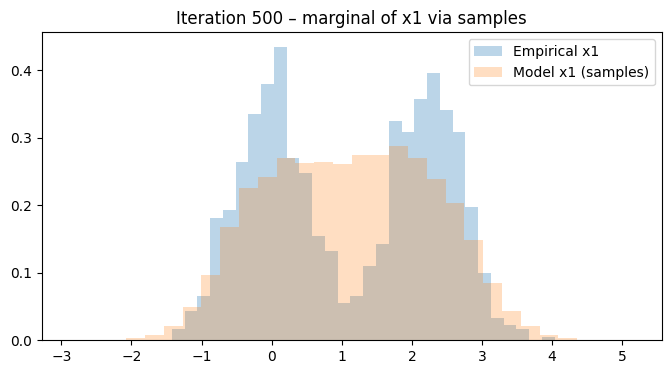

Epoch 500.. final loss of training: 2.2735,
Epoch 501.. final loss of training: 2.2730,
Epoch 502.. final loss of training: 2.2724,
Epoch 503.. final loss of training: 2.2719,
Epoch 504.. final loss of training: 2.2713,
Epoch 505.. final loss of training: 2.2708,
Epoch 506.. final loss of training: 2.2702,
Epoch 507.. final loss of training: 2.2697,
Epoch 508.. final loss of training: 2.2691,
Epoch 509.. final loss of training: 2.2686,
Epoch 510.. final loss of training: 2.2681,
Epoch 511.. final loss of training: 2.2676,
Epoch 512.. final loss of training: 2.2670,
Epoch 513.. final loss of training: 2.2665,
Epoch 514.. final loss of training: 2.2660,
Epoch 515.. final loss of training: 2.2655,
Epoch 516.. final loss of training: 2.2649,
Epoch 517.. final loss of training: 2.2644,
Epoch 518.. final loss of training: 2.2639,
Epoch 519.. final loss of training: 2.2634,
Epoch 520.. final loss of training: 2.2629,
Epoch 521.. final loss of training: 2.2624,
Epoch 522.. final loss of traini

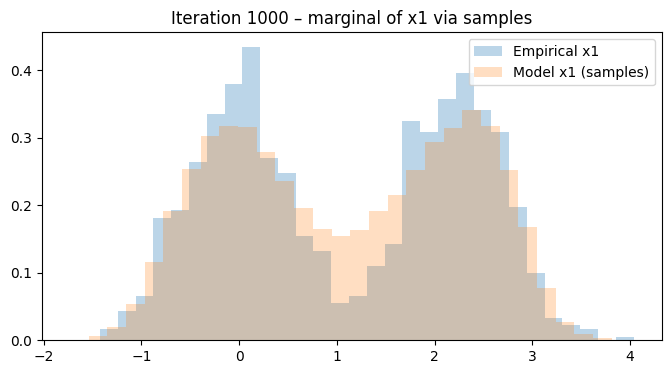

Epoch 1000.. final loss of training: 2.1541,
Epoch 1001.. final loss of training: 2.1540,
Epoch 1002.. final loss of training: 2.1539,
Epoch 1003.. final loss of training: 2.1538,
Epoch 1004.. final loss of training: 2.1536,
Epoch 1005.. final loss of training: 2.1535,
Epoch 1006.. final loss of training: 2.1534,
Epoch 1007.. final loss of training: 2.1533,
Epoch 1008.. final loss of training: 2.1531,
Epoch 1009.. final loss of training: 2.1530,
Epoch 1010.. final loss of training: 2.1529,
Epoch 1011.. final loss of training: 2.1528,
Epoch 1012.. final loss of training: 2.1526,
Epoch 1013.. final loss of training: 2.1525,
Epoch 1014.. final loss of training: 2.1524,
Epoch 1015.. final loss of training: 2.1523,
Epoch 1016.. final loss of training: 2.1521,
Epoch 1017.. final loss of training: 2.1520,
Epoch 1018.. final loss of training: 2.1519,
Epoch 1019.. final loss of training: 2.1518,
Epoch 1020.. final loss of training: 2.1517,
Epoch 1021.. final loss of training: 2.1515,
Epoch 1022

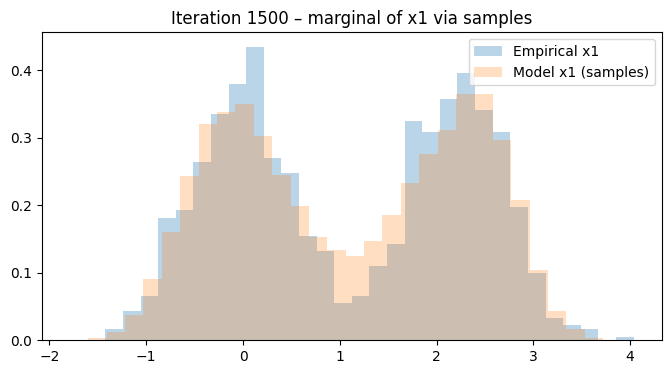

Epoch 1500.. final loss of training: 2.1227,
Epoch 1501.. final loss of training: 2.1227,
Epoch 1502.. final loss of training: 2.1227,
Epoch 1503.. final loss of training: 2.1227,
Epoch 1504.. final loss of training: 2.1226,
Epoch 1505.. final loss of training: 2.1225,
Epoch 1506.. final loss of training: 2.1226,
Epoch 1507.. final loss of training: 2.1225,
Epoch 1508.. final loss of training: 2.1225,
Epoch 1509.. final loss of training: 2.1224,
Epoch 1510.. final loss of training: 2.1224,
Epoch 1511.. final loss of training: 2.1223,
Epoch 1512.. final loss of training: 2.1223,
Epoch 1513.. final loss of training: 2.1222,
Epoch 1514.. final loss of training: 2.1222,
Epoch 1515.. final loss of training: 2.1221,
Epoch 1516.. final loss of training: 2.1221,
Epoch 1517.. final loss of training: 2.1221,
Epoch 1518.. final loss of training: 2.1220,
Epoch 1519.. final loss of training: 2.1220,
Epoch 1520.. final loss of training: 2.1220,
Epoch 1521.. final loss of training: 2.1219,
Epoch 1522

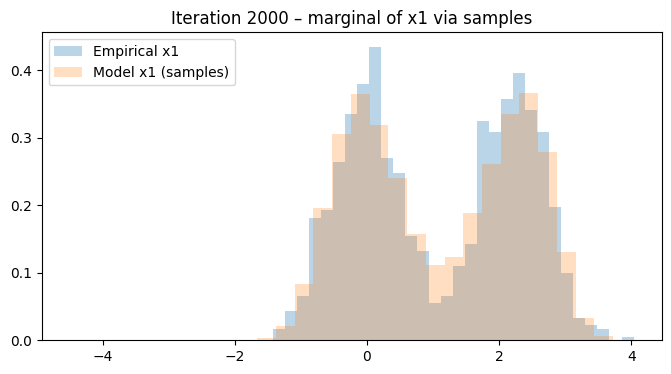

Epoch 2000.. final loss of training: 2.1105,
Epoch 2001.. final loss of training: 2.1104,
Epoch 2002.. final loss of training: 2.1105,
Epoch 2003.. final loss of training: 2.1104,
Epoch 2004.. final loss of training: 2.1104,
Epoch 2005.. final loss of training: 2.1104,
Epoch 2006.. final loss of training: 2.1103,
Epoch 2007.. final loss of training: 2.1104,
Epoch 2008.. final loss of training: 2.1103,
Epoch 2009.. final loss of training: 2.1103,
Epoch 2010.. final loss of training: 2.1102,
Epoch 2011.. final loss of training: 2.1103,
Epoch 2012.. final loss of training: 2.1102,
Epoch 2013.. final loss of training: 2.1102,
Epoch 2014.. final loss of training: 2.1102,
Epoch 2015.. final loss of training: 2.1101,
Epoch 2016.. final loss of training: 2.1102,
Epoch 2017.. final loss of training: 2.1101,
Epoch 2018.. final loss of training: 2.1100,
Epoch 2019.. final loss of training: 2.1101,
Epoch 2020.. final loss of training: 2.1101,
Epoch 2021.. final loss of training: 2.1100,
Epoch 2022

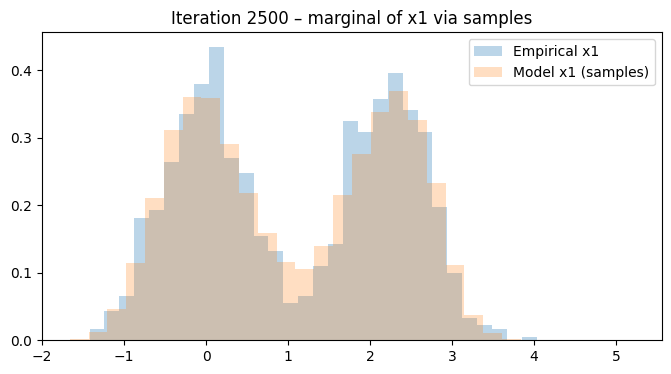

Epoch 2500.. final loss of training: 2.1010,
Epoch 2501.. final loss of training: 2.1009,
Epoch 2502.. final loss of training: 2.1009,
Epoch 2503.. final loss of training: 2.1010,
Epoch 2504.. final loss of training: 2.1010,
Epoch 2505.. final loss of training: 2.1008,
Epoch 2506.. final loss of training: 2.1009,
Epoch 2507.. final loss of training: 2.1011,
Epoch 2508.. final loss of training: 2.1008,
Epoch 2509.. final loss of training: 2.1009,
Epoch 2510.. final loss of training: 2.1007,
Epoch 2511.. final loss of training: 2.1009,
Epoch 2512.. final loss of training: 2.1008,
Epoch 2513.. final loss of training: 2.1008,
Epoch 2514.. final loss of training: 2.1006,
Epoch 2515.. final loss of training: 2.1007,
Epoch 2516.. final loss of training: 2.1007,
Epoch 2517.. final loss of training: 2.1007,
Epoch 2518.. final loss of training: 2.1006,
Epoch 2519.. final loss of training: 2.1007,
Epoch 2520.. final loss of training: 2.1005,
Epoch 2521.. final loss of training: 2.1006,
Epoch 2522

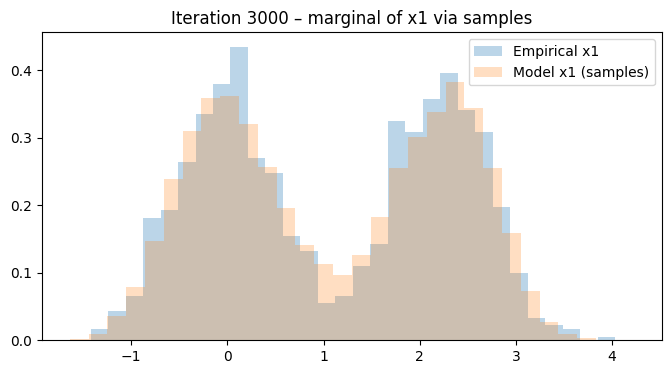

Epoch 3000.. final loss of training: 2.0957,
Epoch 3001.. final loss of training: 2.0959,
Epoch 3002.. final loss of training: 2.0957,
Epoch 3003.. final loss of training: 2.0958,
Epoch 3004.. final loss of training: 2.0957,
Epoch 3005.. final loss of training: 2.0958,
Epoch 3006.. final loss of training: 2.0958,
Epoch 3007.. final loss of training: 2.0957,
Epoch 3008.. final loss of training: 2.0957,
Epoch 3009.. final loss of training: 2.0958,
Epoch 3010.. final loss of training: 2.0956,
Epoch 3011.. final loss of training: 2.0956,
Epoch 3012.. final loss of training: 2.0958,
Epoch 3013.. final loss of training: 2.0956,
Epoch 3014.. final loss of training: 2.0955,
Epoch 3015.. final loss of training: 2.0955,
Epoch 3016.. final loss of training: 2.0956,
Epoch 3017.. final loss of training: 2.0956,
Epoch 3018.. final loss of training: 2.0956,
Epoch 3019.. final loss of training: 2.0956,
Epoch 3020.. final loss of training: 2.0955,
Epoch 3021.. final loss of training: 2.0955,
Epoch 3022

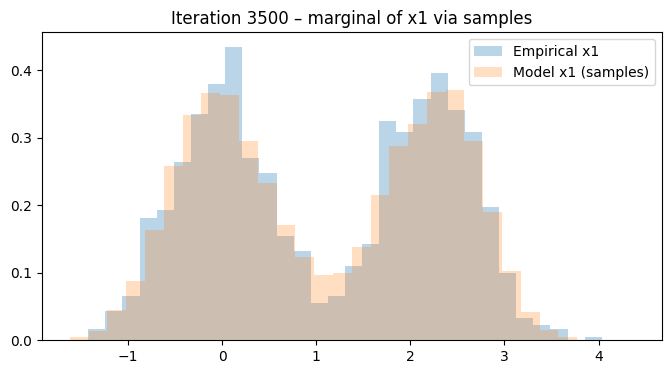

Epoch 3500.. final loss of training: 2.0920,
Epoch 3501.. final loss of training: 2.0920,
Epoch 3502.. final loss of training: 2.0920,
Epoch 3503.. final loss of training: 2.0920,
Epoch 3504.. final loss of training: 2.0919,
Epoch 3505.. final loss of training: 2.0920,
Epoch 3506.. final loss of training: 2.0919,
Epoch 3507.. final loss of training: 2.0919,
Epoch 3508.. final loss of training: 2.0919,
Epoch 3509.. final loss of training: 2.0919,
Epoch 3510.. final loss of training: 2.0918,
Epoch 3511.. final loss of training: 2.0919,
Epoch 3512.. final loss of training: 2.0919,
Epoch 3513.. final loss of training: 2.0919,
Epoch 3514.. final loss of training: 2.0918,
Epoch 3515.. final loss of training: 2.0917,
Epoch 3516.. final loss of training: 2.0919,
Epoch 3517.. final loss of training: 2.0917,
Epoch 3518.. final loss of training: 2.0917,
Epoch 3519.. final loss of training: 2.0917,
Epoch 3520.. final loss of training: 2.0918,
Epoch 3521.. final loss of training: 2.0917,
Epoch 3522

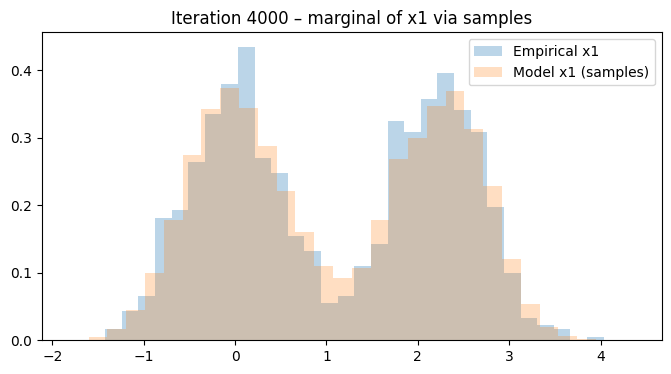

Epoch 4000.. final loss of training: 2.0858,
Epoch 4001.. final loss of training: 2.0853,
Epoch 4002.. final loss of training: 2.0855,
Epoch 4003.. final loss of training: 2.0860,
Epoch 4004.. final loss of training: 2.0853,
Epoch 4005.. final loss of training: 2.0863,
Epoch 4006.. final loss of training: 2.0855,
Epoch 4007.. final loss of training: 2.0860,
Epoch 4008.. final loss of training: 2.0856,
Epoch 4009.. final loss of training: 2.0855,
Epoch 4010.. final loss of training: 2.0858,
Epoch 4011.. final loss of training: 2.0853,
Epoch 4012.. final loss of training: 2.0857,
Epoch 4013.. final loss of training: 2.0852,
Epoch 4014.. final loss of training: 2.0856,
Epoch 4015.. final loss of training: 2.0852,
Epoch 4016.. final loss of training: 2.0857,
Epoch 4017.. final loss of training: 2.0861,
Epoch 4018.. final loss of training: 2.0854,
Epoch 4019.. final loss of training: 2.0864,
Epoch 4020.. final loss of training: 2.0851,
Epoch 4021.. final loss of training: 2.0861,
Epoch 4022

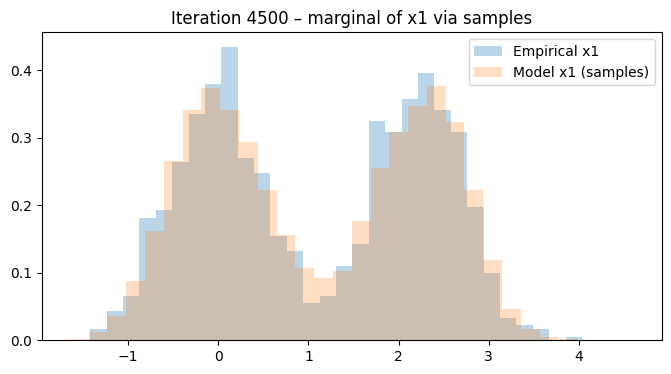

Epoch 4500.. final loss of training: 2.0829,
Epoch 4501.. final loss of training: 2.0828,
Epoch 4502.. final loss of training: 2.0828,
Epoch 4503.. final loss of training: 2.0829,
Epoch 4504.. final loss of training: 2.0827,
Epoch 4505.. final loss of training: 2.0831,
Epoch 4506.. final loss of training: 2.0828,
Epoch 4507.. final loss of training: 2.0829,
Epoch 4508.. final loss of training: 2.0828,
Epoch 4509.. final loss of training: 2.0830,
Epoch 4510.. final loss of training: 2.0826,
Epoch 4511.. final loss of training: 2.0829,
Epoch 4512.. final loss of training: 2.0825,
Epoch 4513.. final loss of training: 2.0826,
Epoch 4514.. final loss of training: 2.0826,
Epoch 4515.. final loss of training: 2.0827,
Epoch 4516.. final loss of training: 2.0827,
Epoch 4517.. final loss of training: 2.0823,
Epoch 4518.. final loss of training: 2.0827,
Epoch 4519.. final loss of training: 2.0824,
Epoch 4520.. final loss of training: 2.0827,
Epoch 4521.. final loss of training: 2.0826,
Epoch 4522

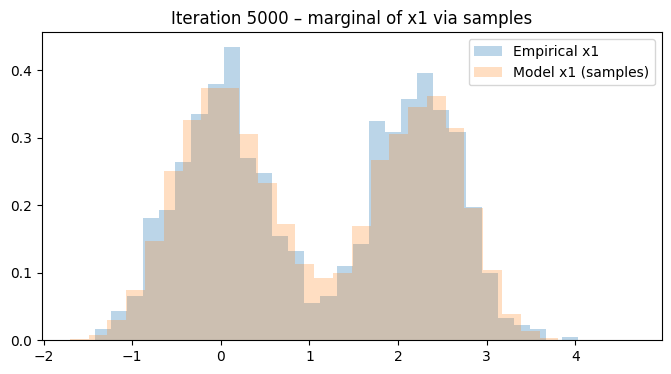

In [312]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=4))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



x = torch.tensor(bimodal_vector.reshape(-1, 1), dtype=torch.float32)
# x = torch.concat([x,torch.ones(bimodal_vector.shape[0]).reshape(-1, 1)], dim=1)
x = torch.concat([x,
                   torch.tensor(np.random.normal(loc=0.0, scale=0.5, size=bimodal_vector.shape[0]), dtype=torch.float32 ).reshape(-1, 1)], dim=1)
num_iter = 5000
for i in range(num_iter):
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    print(f"Epoch {i}.. final loss of training: {loss:.4f},")
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        with torch.no_grad():
            xs = flow.sample(50000).cpu().numpy()   # [N, 2]

        plt.figure(figsize=(8,4))
        plt.hist(x[:,0].cpu().numpy(), bins=30, density=True, alpha=0.3, label="Empirical x1")
        plt.hist(xs[:,0], bins=30, density=True, linewidth=2,alpha=0.25, label="Model x1 (samples)")
        plt.legend()
        plt.title(f"Iteration {i+1} – marginal of x1 via samples")
        plt.show()

In [313]:
with torch.no_grad():
    uu, logabsdet = flow._transform(x) 

(array([  7.,  36.,  90., 178., 283., 205., 129.,  57.,  13.,   2.]),
 array([-3.09077978, -2.43219113, -1.77360249, -1.11501384, -0.45642519,
         0.20216346,  0.86075211,  1.51934075,  2.1779294 ,  2.83651805,
         3.4951067 ]),
 <BarContainer object of 10 artists>)

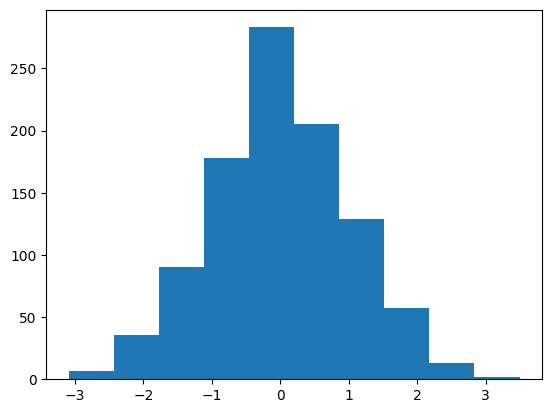

In [314]:
plt.hist(uu[:,1])

In [291]:
with torch.no_grad():
    x_rec, _ = flow._transform.inverse(uu)

(array([ 23., 116., 209., 122.,  46., 105., 193., 154.,  28.,   4.]),
 array([-1.42257559, -0.87684017, -0.33110476,  0.21463066,  0.76036608,
         1.30610156,  1.85183692,  2.39757228,  2.94330788,  3.48904324,
         4.03477859]),
 <BarContainer object of 10 artists>)

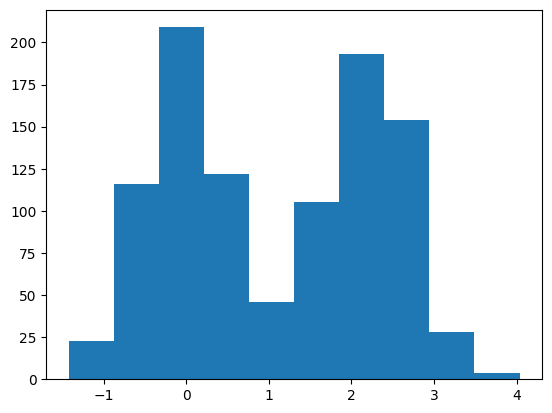

In [292]:
plt.hist(x_rec[:,0])

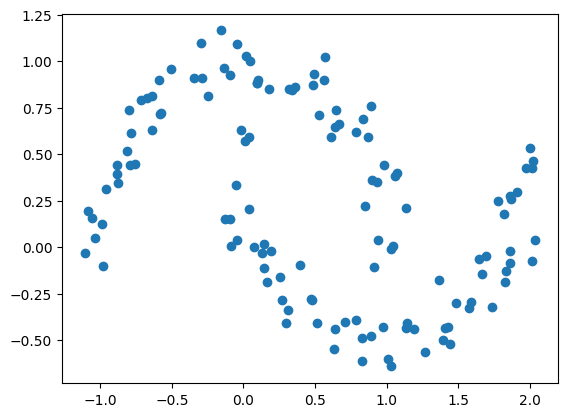

In [251]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation





x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1])




C:\Users\amaguaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


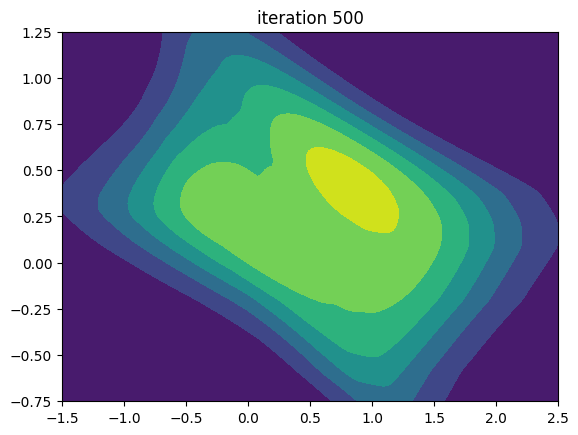

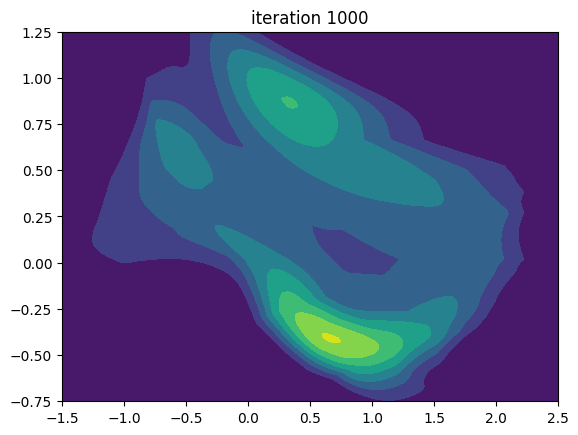

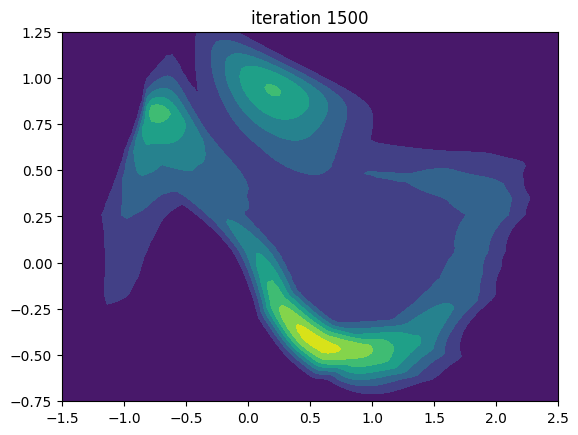

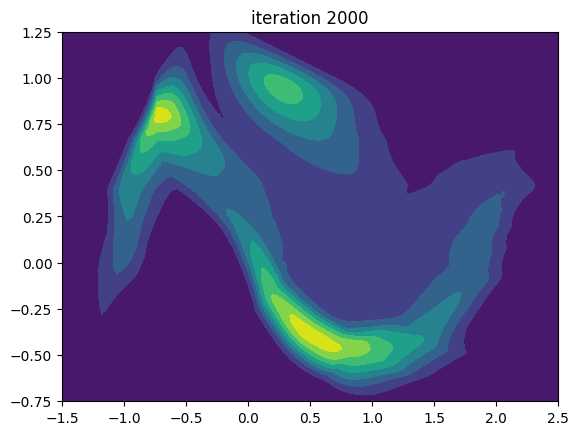

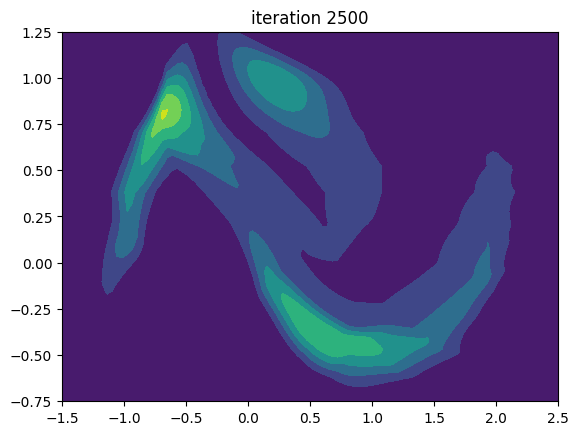

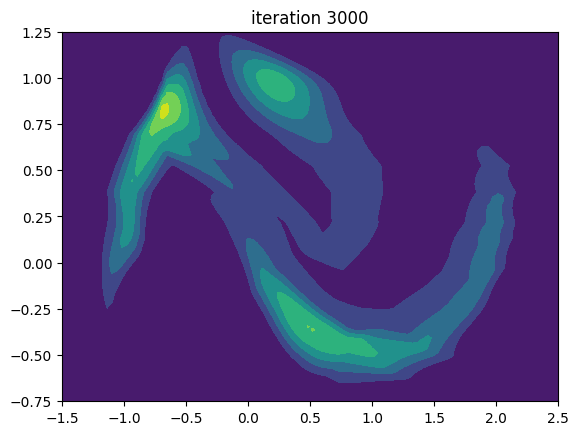

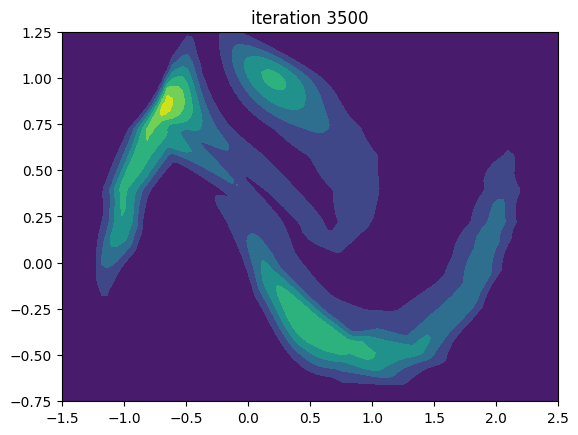

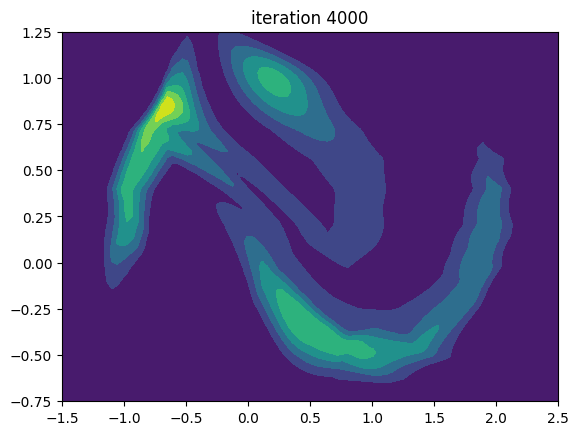

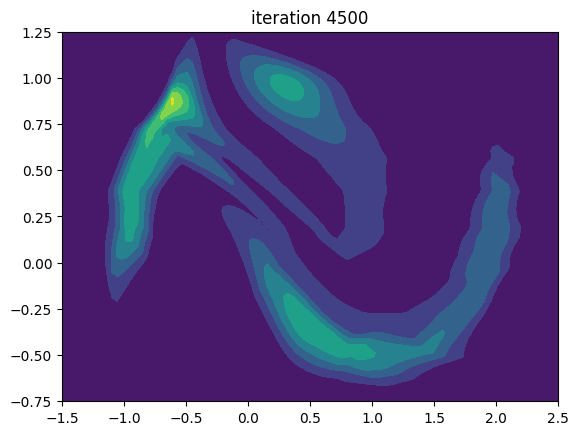

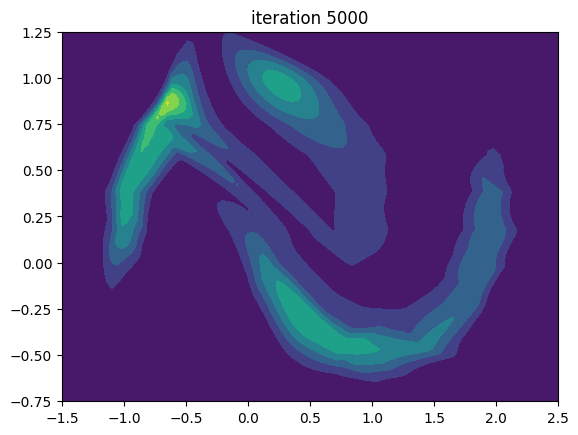

In [253]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=4))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())




num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        xline = torch.linspace(-1.5, 2.5,100)
        yline = torch.linspace(-.75, 1.25,100)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = flow.log_prob(xyinput).exp().reshape(100, 100)

        plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy())
        plt.title('iteration {}'.format(i + 1))
        plt.show()



In [254]:
with torch.no_grad():
    z, logabsdet = flow._transform(x) 

(array([ 4.,  4.,  9., 18., 24., 25., 22., 11.,  5.,  6.]),
 array([-2.55278563, -2.03263068, -1.51247573, -0.99232072, -0.47216573,
         0.04798925,  0.5681442 ,  1.08829916,  1.60845423,  2.12860918,
         2.64876413]),
 <BarContainer object of 10 artists>)

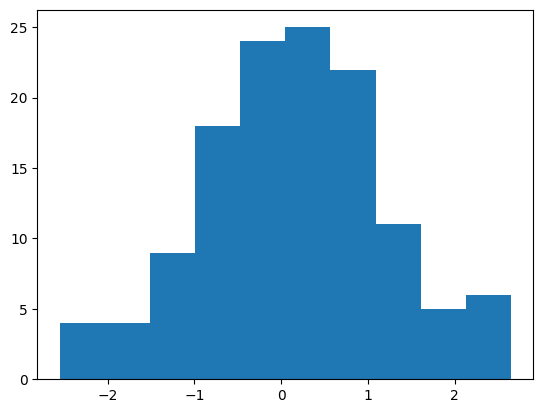

In [258]:
plt.hist(z[:,1])

In [193]:
# z = tss.transform_to_noise(yt)

In [194]:
# from nflows.distributions.normal import StandardNormal
# from nflows.flows.base import Flow

# flow = Flow(tss._transform, StandardNormal(shape=[1]))
# z = flow.transform_to_noise(yt)

# plt.hist(z.detach().numpy(), bins=50, density=True)
# plt.title("Histogram of z = f(x), should look normal")
# plt.show()


In [191]:
# plt.hist(yt.flatten().numpy(), bins=50, density=True, alpha=0.5)

In [195]:
# tss.eval()
# with torch.no_grad():
#     z, logabsdet = tss._transform(yt) 
# plt.hist(z.flatten().numpy(), bins=50, density=True, alpha=0.5)

In [196]:
# torch.concat([yt,z], dim=1)
# plt.hist(z.flatten().detach().numpy())

In [197]:
# first_coupling = tss._transform._transforms[3]  # First AffineCouplingTransform
# with torch.no_grad():
#     # Get the part of yt used as identity input to the NN
#     identity = yt[:, first_coupling.identity_features]
#     transform_params = first_coupling.transform_net(identity)

#     s, t = first_coupling._scale_and_shift(transform_params)

#     print("Shift (t):", t.flatten())
#     print("Scale (s):", s.flatten())

In [198]:
# plt.hist(yt.flatten())
# plt.hist(z.flatten())
# torch.concat([yt,z], dim=1)
# first_coupling = tss._transform._transforms[1]  # First AffineCouplingTransform
# with torch.no_grad():
#     # Get the part of yt used as identity input to the NN
#     identity = yt[:, first_coupling.identity_features]
#     transform_params = first_coupling.transform_net(identity)

#     s, t = first_coupling._scale_and_shift(transform_params)

#     print("Shift (t):", t.flatten())
#     print("Scale (s):", s.flatten())

In [199]:
# with torch.no_grad():
#     x_reconstructed, _ = tss._transform.inverse(z)


In [155]:
# x_reconstructed

# torch.concat([yt,x_reconstructed], dim=1)

In [134]:
# [-1,1,-1,1]
# mask: a 1-dim tensor, tuple or list. It indexes inputs as follows:
#     * If `mask[i] > 0`, `input[i]` will be transformed.  -------- 1
#     * If `mask[i] <= 0`, `input[i]` will be passed unchanged. --- 0

In [200]:
# tss._transform._transforms[0]

In [201]:
# with torch.no_grad():
#     x_reconstructed, _ = tss._inverse(z)

# tss._transform._transforms[1]


In [202]:
# Data
# x = torch.tensor([1., 2., 3., 6., 2., 9., 4., 5., 7., 8.]).reshape(-1, 1)
# x = y

# x = torch.tensor(y, dtype=torch.float32)#.reshape(-1, 1)
# coupling_constructor = AffineCouplingTransform
# features = len(x)#x.shape[1]
# mask = torch.ones(features)
# mask[::2] = -1
# # mask: a 1-dim tensor, tuple or list. It indexes inputs as follows:
# #     * If `mask[i] > 0`, `input[i]` will be transformed.  -------- 1
# #     * If `mask[i] <= 0`, `input[i]` will be passed unchanged. --- 0

# # Define a conditioner network
# def create_resnet(in_features, out_features):
#     return ResidualNet(
#         in_features=in_features,
#         out_features=out_features,
#         hidden_features=32,
#         num_blocks=2,
#         dropout_probability=0,
#         use_batch_norm=False,
#         activation= F.relu
#     )

# # RealNVP transforms
# num_layers = 4
# layers = []
# for i in range(num_layers):
#     transform = coupling_constructor(
#                 mask=mask, transform_net_create_fn=create_resnet
#             )
#     layers.append(transform)
#     mask *= -1
#     # mask = torch.tensor([1.0]) if i % 2 == 0 else torch.tensor([0.0])

# # 4. Compose Flow
# transform = CompositeTransform(layers)
# base_dist = StandardNormal(shape=[features])
# flow = Flow(transform, base_dist)

# # 5. Train
# optimizer = torch.optim.Adam(flow.parameters(), lr=1e-3)
# batch_size_ = ceil(x.shape[0]/1)
# data_loader = DataLoader(TensorDataset(x), batch_size=batch_size_, shuffle=False)


# for epoch in range(200):
#     for batch in data_loader:
#         batch_x = batch[0]
#         optimizer.zero_grad()
#         loss = -flow.log_prob(inputs=batch_x).mean()
#         loss.backward()
#         optimizer.step()
#     if epoch % 20 == 0:
#         print(f"Epoch {epoch}: Loss = {loss.item():.4f}")
#         xline = torch.linspace(torch.min(x.flatten())-1,  torch.max(x.flatten())+1, 500).reshape(-1, 1)
#         with torch.no_grad():
#             log_probs = flow.log_prob(xline)
#             probs = torch.exp(log_probs)
#         plt.figure(figsize=(8, 4))
#         plt.hist(x.numpy(), bins=30, density=True, alpha=0.2, label="Empirical")
#         plt.plot(xline.numpy(), probs.numpy(), label="Learned PDF")
#         plt.legend()
#         plt.title(f"Learned Density using RealNVP, iteration {epoch}")
#         plt.show()



In [90]:
# Estimate p(x) via RealNVP
# log_px = flow.log_prob(x)

In [91]:
# log_px.sum()/x.shape[0]

In [92]:
# # 6. Plot learned density
# flow.eval()
# x_test = torch.linspace(torch.min(x.flatten())-1, torch.max(x.flatten())+1, 500).reshape(-1, 1)
# with torch.no_grad():
#     log_probs = flow.log_prob(x_test)
#     probs = torch.exp(log_probs)

# plt.figure(figsize=(8, 4))
# plt.hist(x.numpy(), bins=30, density=True, alpha=0.5, label="Empirical")
# plt.plot(x_test.numpy(), probs.numpy(), label="Learned PDF")
# plt.legend()
# plt.title("Learned Density using RealNVP")
# plt.show()

In [91]:
# len(data_loader)
# batch_x
# batch_size_ = ceil(x.shape[0]/10)
# data_loader = DataLoader(TensorDataset(x), batch_size=batch_size_, shuffle=True)
# batch_size_


# test using SplineTransformer

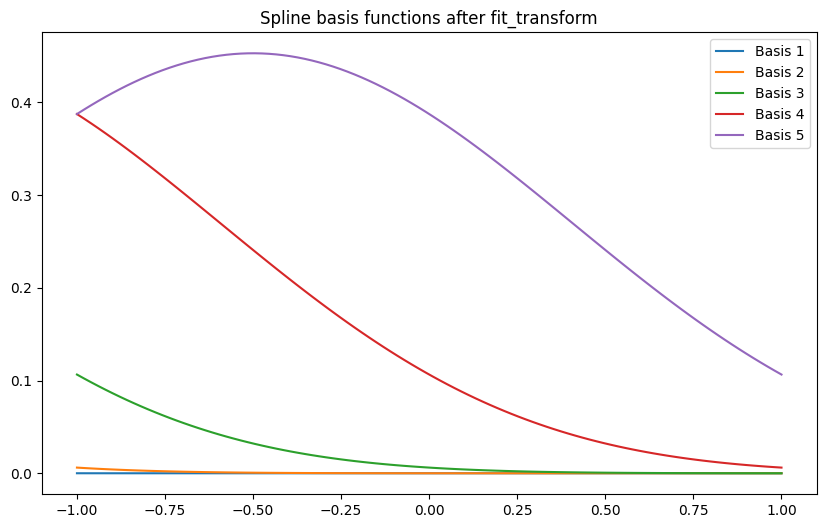

In [36]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
import matplotlib.pyplot as plt

# 1. Simulated x data
x = np.linspace(-1, 1, 100).reshape(-1, 1)

# 2. Set up transformer
spline = SplineTransformer(n_knots=3, degree=8, include_bias=False)

# 3. Fit-transform x
Phi = spline.fit_transform(x)

# 4. Plot first few basis functions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, Phi[:, i], label=f'Basis {i+1}')
plt.title('Spline basis functions after fit_transform')
plt.legend()
plt.show()

In [ ]:
# 1e8, 1e-7, 1e7
# len(tmp_cha.B[180].strip().split(' '))
# tmp_cha
# list(range(2,3))
# pair_id =108
# f'/pair{pair_id:04d}.txt'

# tmp_cha = pd.read_csv('C:/Users/amaguaya/OneDrive - Kienzle Automotive GmbH/Desktop/tesis_code/repos/loci/data/Dataverse_pairs/CE-Net_pairs.csv')

In [ ]:
import pandas as pd
# rp = pd.read_csv("C:/Users/amaguaya/Downloads/report.csv", sep=';', encoding='latin1', low_memory=False)
# rp.columns = [col.strip().lower().replace(' ', '_').replace('.', '').replace('-', '_') for col in rp.columns]
# rp = rp.astype(str)
# rp = rp.applymap(lambda x: str(x).encode('latin1', errors='ignore').decode('latin1') if pd.notnull(x) else "")

# rp = pd.read_excel('C:/Users/amaguaya/Downloads/rep_short.xlsx', sheet_name='Sheet2',dtype=str)

# Fill explicitly missing or corrupted values with empty string
# rp = rp.fillna("")

# Force convert all elements to string type
# rp = rp.astype(str)

# rp = pd.read_csv("C:/Users/amaguaya/Downloads/report.csv", sep=';', encoding='latin1', low_memory=False)
# rp = pd.read_csv("C:/Users/amaguaya/Downloads/report.csv", sep=';') 
# rp['auftragseingangsdatum'] = pd.to_datetime(rp['auftragseingangsdatum'], errors='coerce')
# rp = rp[rp.auftragseingangsdatum > '2025-06-30 23:59:59']
# rp.sort_values('auftragseingangsdatum', ascending=False, inplace=True)
# rp.loc[rp.kanal == 'shop','zeilenwert_netto'].sum()

In [6]:
# rp = rp.fillna("")  # Replace any actual NaNs just in case
# rp.to_csv("C:/Users/amaguaya/Downloads/cleaned_report2.csv", index=False, sep=';', encoding='utf-8-sig')



In [7]:
# pd.read_csv("C:/Users/amaguaya/Downloads/cleaned_report2.csv", sep=';', encoding='utf-8-sig', low_memory=False, on_bad_lines='skip')
# with open("C:/Users/amaguaya/Downloads/cleaned_report2.csv", encoding='utf-8-sig') as f:
#     content = f.read()

# # Optional: print first 200 chars to check
# print(repr(content[:200]))

# file_path = "C:/Users/amaguaya/Downloads/cleaned_report2.csv"
# with open(file_path, encoding='utf-8-sig') as f:
#     lines = f.readlines()

# # Step 2: Remove problematic lines that don't match expected column count
# clean_lines = []
# expected_n_cols = len(lines[0].strip().split(";"))

# for i, line in enumerate(lines):
#     if len(line.strip().split(";")) == expected_n_cols:
#         clean_lines.append(line)

# # Step 3: Convert into a DataFrame
# from io import StringIO
# csv_buffer = StringIO("".join(clean_lines))
# df = pd.read_csv(csv_buffer, sep=";", encoding='utf-8-sig')

In [ ]:
# # Step 1: Remove newline characters and split by semicolon
# parsed_rows = [line.strip().split(";") for line in clean_lines]

# # Step 2: First row is the header
# header = parsed_rows[0]
# data = parsed_rows[1:]

# # Step 3: Create DataFrame
# df = pd.DataFrame(data, columns=header)

In [ ]:
# rp = rp.applymap(lambda x: str(x).encode('latin1', errors='ignore').decode('latin1') if pd.notnull(x) else x)
# rp = pd.read_csv("C:/Users/amaguaya/Downloads/cleaned_report.csv", sep=';', encoding='latin1', low_memory=False)
# rp = pd.read_excel("C:/Users/amaguaya/Downloads/rep_short.xlsx")
# rp.columns = ['auftragsnummer'] + rp.columns.tolist()[1:]


In [212]:
# Data
# x = torch.tensor([1., 2., 3., 6., 2., 9., 4., 5., 7., 8.]).reshape(-1, 1)
x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)

# Define a conditioner network
def create_net(in_features, out_features):
    return ResidualNet(
        in_features=in_features,
        out_features=out_features,
        hidden_features=32,
        num_blocks=2
    )

# RealNVP transforms
transforms = []
for i in range(4):
    transforms.append(ReversePermutation(features=1))
    mask = torch.tensor([1.0]) if i % 2 == 0 else torch.tensor([0.0])
    transforms.append(
        AffineCouplingTransform(
            mask=mask,
            transform_net_create_fn=create_net
        )
    )

# 4. Compose Flow
transform = CompositeTransform(transforms)
base_dist = StandardNormal(shape=[1])
flow = Flow(transform, base_dist)

# 5. Train
flow.train()
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-3)
batch_size_ = ceil(x.shape[0]/10)
data_loader = DataLoader(TensorDataset(x), batch_size=batch_size_, shuffle=True)


for epoch in range(600):
    for batch in data_loader:
        batch_x = batch[0]
        loss = -flow.log_prob(inputs=batch_x).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")



C:\Users\amaguaya\AppData\Local\Temp\ipykernel_45252\2322337522.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
C:\Users\amaguaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


TypeError: '_NoValueType' object cannot be interpreted as an integer

In [185]:
# df.columns = [
#     col.strip().lower().replace(' ', '_').replace('.', '_').replace(',', '_')
#     for col in df.columns
# ]

# import re

# df.columns = [
#     re.sub(r'\W+', '_', col.strip().lower()) for col in df.columns
# ]

In [186]:
# df.iloc[:,2]

In [ ]:
# import numpy as np
# p1 = pd.read_excel("C:/Users/amaguaya/Kienzle Automotive GmbH/Power Bi - Documents/fact_Tables/Input Partnerportal/Everleaf/Processed Data_Kienzle_01_02_2025.xlsx",
#                        converters={
#         'SQL Won Date': str,
#         'Follow Up Date': str,
#         'Appointment Date': str,
#         'Start Processing Date': str,
#         'Close Date': str,
#         'Order Placed Date': str,
#         'Processed SQL Date': str,
#         'Created Date': str
#     })
# p1 = pd.read_csv("C:/Users/amaguaya/Kienzle Automotive GmbH/Power Bi - Documents/fact_Tables/Input Partnerportal/Everleaf/Processed Data_Kienzle_01_02_2025 - Copy.csv", sep=';').iloc[:,:-2]
# p1 = p1.dropna(axis=0, how='all')
# p2 = pd.read_excel("C:/Users/amaguaya/Kienzle Automotive GmbH/Power Bi - Documents/fact_Tables/Input Partnerportal/Everleaf/Processed Opportunities Jan-Jun 2025.xlsx")


# # List of date columns
# date_columns = [ 'SQL Won Date', 'Follow Up Date',
#     'Appointment Date', 'Start Processing Date', 'Close Date',
#     'Order Placed Date', 'Processed SQL Date', 'Created Date'
# ]

# # Step 1: Replace NaT with np.nan (optional, pandas usually handles this)
# p1[date_columns] = p1[date_columns].replace({pd.NaT: np.nan})
# p2[date_columns] = p2[date_columns].replace({pd.NaT: np.nan})

# # Step 2: Convert all to datetime, auto-parsing mixed formats
# for col in date_columns:
#     p1[col] = pd.to_datetime(p1[col], errors='coerce', dayfirst=True)
#     p2[col] = pd.to_datetime(p2[col], errors='coerce', dayfirst=True)

# # Step 3: Format to 'YYYY-MM-DD HH:MM:SS'
# for col in date_columns:
#     p1[col] = p1[col].dt.strftime('%Y-%m-%d %H:%M:%S')
#     p2[col] = p2[col].dt.strftime('%Y-%m-%d %H:%M:%S')

# # Optional: Replace 'NaT' string (from strftime) back to np.nan if desired
# p1.replace('NaT', np.nan, inplace=True)
# p2.replace('NaT', np.nan, inplace=True)

# # p1.shape, p2.shape
# # Select only p1's columns from p2 (ignore extra columns)
# p2_aligned = p2[p1.columns]

# # Concatenate
# combined = pd.concat([p1, p2_aligned], ignore_index=True)
# combined['Kienzle Kundennr.'] = combined['Kienzle Kundennr.'].astype(str)

# combined_tmp = combined.assign(
#     Created_Date_dt = pd.to_datetime(combined['Created Date'], errors='coerce', dayfirst=True)
# )

# latest_rows = (
#     combined_tmp
#     .groupby(['Opportunity Name', 'Kienzle Kundennr.'])
#     .apply(lambda g: g.sort_values('Created_Date_dt', ascending=False).head(1))
#     .reset_index(drop=True)
# )
# latest_rows['Kienzle Kundennr.'].replace('nan',np.nan, inplace=True)

# latest_rows.iloc[:,:-1].to_excel('C:/Users/amaguaya/Kienzle Automotive GmbH/Power Bi - Documents/fact_Tables/Input Partnerportal/Everleaf/Processed_data_Opportunities_01_02_with_Jan_Jun_2025.xlsx', 
#                   index=False, sheet_name='Sheet1')